# Lending Club Case Study - Abhijit Majumdar

In [9]:
#Initiation python code
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

#read data from loan.csv
loan_source_data = pd.read_csv(r'C:\Users\Rana\Desktop\Abhijit Work\loan\loan.csv')

loan_source_data.head()

C:\Users\Rana\AppData\Local\Temp\ipykernel_19116\3895533082.py:10: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_source_data = pd.read_csv(r'C:\Users\Rana\Desktop\Abhijit Work\loan\loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [10]:
#Data cleaning steps
#Find null values in the data set
loan_source_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [11]:
#checking number of data rows and columns
loan_source_data.shape

(39717, 111)

#Quick observation
The sample of last four columns tot_hi_cred_lim, total_bal_ex_mort, total_bc_limit, total_il_high_credit_limit has all null values. Next step is to remove all the columns that has all null values

In [12]:
#dropping all columns that has all null values in it
loan_source_data.dropna(axis = 1, how = 'all', inplace = True)
loan_source_data.shape

(39717, 57)

Total of 54 columns had all null values and were removed and thus reducing the number of columns to 57

In [13]:
#checking other columns with high number of null values
stg = loan_source_data.isnull().sum()
stg

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

#There are multiple columns with high number of null values. Let's remove those for better EDA. We can remove the ones that has more than 12000 nulls.

In [14]:
#removing rest of the fields with high number of null values
loan_source_data.drop(columns=list(stg[stg.values > 12000].index), inplace=True)

In [15]:
loan_source_data.shape

(39717, 53)

In [16]:
#Checking for columns with unique values or single values
uni_col = loan_source_data.nunique()
print(uni_col)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

In [17]:
#deleting columns with single values as it won't be beneficial in making analysis
stg1 = uni_col[uni_col.values == 1]
stg1.index

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [18]:
loan_source_data.drop(columns=(list(stg1.index)), inplace=True)
loan_source_data.shape

(39717, 44)

In [19]:
#removing identity columns, zipcode(masked data) and all the data that are generated after loan is processed
stg2 = ["id","member_id","url","zip_code","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"]
loan_source_data.drop(columns=stg2, inplace=True)
loan_source_data.shape

(39717, 28)

## Data Preparation
### Cleaning rows that are not required

In [20]:
#checking various statuses associated with loans
loan_source_data['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [21]:
#current loan information is irrelevant for EDA
#removing rows of current status
loan_source_data = loan_source_data[~(loan_source_data['loan_status'] == 'Current')]
loan_source_data.shape

(38577, 28)

In [24]:
loan_source_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,20.00,0,Feb-96,1,10,0,5598,21%,37,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,...,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.0


In [26]:
#the field revol_util has % sign which will make it difficult to use for EDA. Removing % sign
loan_source_data['revol_util'].describe()
loan_source_data['revol_util'] = pd.Series(loan_source_data['revol_util']).str.replace('%', '').astype(float)


In [27]:
loan_source_data['revol_util'].head()

0    83.7
1     9.4
2    98.5
3    21.0
5    28.3
Name: revol_util, dtype: float64

In [36]:
loan_source_data['int_rate'].describe()
loan_source_data['int_rate'] = pd.Series(loan_source_data['int_rate']).str.replace('%', '').astype(float)

In [37]:
loan_source_data['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

C:\Users\Rana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

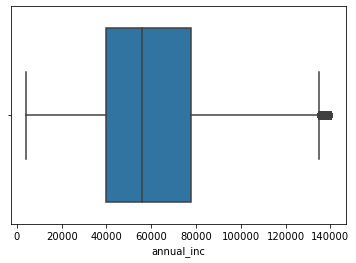

In [38]:
#Checking for outliers for measure fields:annual income, interest rate, loan amount, dti
sns.boxplot(loan_source_data['annual_inc'])

In [39]:
#checking quantile data
quantile_data = loan_source_data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_data

0.50     56000.0
0.75     77970.5
0.90    100000.0
0.95    117000.0
0.97    124000.0
0.98    129000.0
0.99    135000.0
Name: annual_inc, dtype: float64

In [40]:
#removing outliers from 95th percentile onwards
percentile95_annual_inc = loan_source_data['annual_inc'].quantile(0.95)
loan_source_data = loan_source_data[loan_source_data.annual_inc <= percentile95_annual_inc]

C:\Users\Rana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

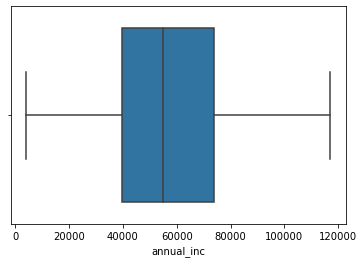

In [41]:
sns.boxplot(loan_source_data['annual_inc'])

C:\Users\Rana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='int_rate'>

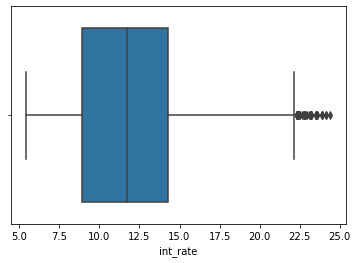

In [42]:
#checking for interest rate outliers
sns.boxplot(loan_source_data['int_rate'])


In [43]:
#checking quantile data
quantile_data_int_rate = loan_source_data.int_rate.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_data_int_rate

#interest rate shows some outliers which we can check during univariate analysis

0.50    11.71
0.75    14.27
0.90    16.77
0.95    18.25
0.97    19.03
0.98    19.74
0.99    20.89
Name: int_rate, dtype: float64

C:\Users\Rana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_amnt'>

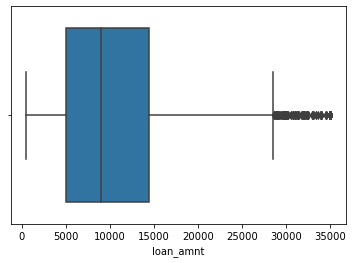

In [44]:
#loan amount box plot
sns.boxplot(loan_source_data['loan_amnt'])

C:\Users\Rana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dti'>

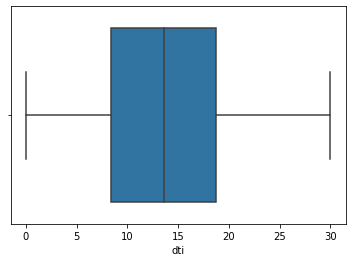

In [69]:
# loan amount above shows some outliers and can be explored later during univariate analysis
#DTI box plot
sns.boxplot(loan_source_data['dti'])

#DTI doesn't show any outliers so we are good with this

In [45]:
#separating month and year from Issue Date column
m, y = loan_source_data['issue_d'].str.split('-').str

C:\Users\Rana\AppData\Local\Temp\ipykernel_19116\302370859.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  m, y = loan_source_data['issue_d'].str.split('-').str


In [46]:
loan_source_data['issue_year'] = pd.to_numeric(y)
loan_source_data['issue_month'] = m
#dropping issue_d as it is not required anymore
loan_source_data.drop(columns=['issue_d'], inplace=True)

In [47]:
loan_source_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_year,issue_month
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,Jan-85,1,3,0,13648,83.7,9,0.0,11,Dec
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,Apr-99,5,3,0,1687,9.4,4,0.0,11,Dec
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,Nov-01,2,2,0,2956,98.5,10,0.0,11,Dec
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,Feb-96,1,10,0,5598,21.0,37,0.0,11,Dec
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,Nov-04,3,9,0,7963,28.3,12,0.0,11,Dec


In [48]:
loan_source_data['grade'].value_counts()

B    10606
A     9186
C     7143
D     4582
E     2275
F      811
G      229
Name: grade, dtype: int64

In [49]:
loan_source_data['sub_grade'].value_counts()

A4    2631
B3    2521
A5    2472
B5    2392
B4    2220
C1    1872
B2    1822
C2    1765
A3    1663
B1    1651
A2    1386
C3    1361
D2    1160
C4    1101
C5    1044
A1    1034
D3    1013
D1     838
D4     831
D5     740
E1     632
E2     534
E3     439
E4     363
E5     307
F1     253
F2     194
F3     144
F4     129
F5      91
G1      76
G2      61
G3      36
G4      35
G5      21
Name: sub_grade, dtype: int64

In [80]:
loan_source_data['emp_title'].value_counts()

US Army                                     129
Bank of America                             105
AT&T                                         57
IBM                                          52
USAF                                         52
                                           ... 
Henry Ford Village (Erickson Retirement)      1
signature health care                         1
Beaver Humane Society                         1
Balous Jewelers                               1
Evergreen Center                              1
Name: emp_title, Length: 26849, dtype: int64

In [50]:
loan_source_data['emp_length'].value_counts()

10+ years    7309
< 1 year     4131
2 years      3945
3 years      3642
4 years      3060
1 year       2923
5 years      2915
6 years      1982
7 years      1570
8 years      1267
9 years      1087
Name: emp_length, dtype: int64

In [51]:
loan_source_data['home_ownership'].value_counts()

RENT        17575
MORTGAGE    14412
OWN          2753
OTHER          90
NONE            2
Name: home_ownership, dtype: int64

In [83]:
loan_source_data['verification_status'].value_counts()

Not Verified       16280
Verified           11219
Source Verified     9155
Name: verification_status, dtype: int64

In [52]:
loan_source_data['issue_year'].value_counts()

11    18452
10    10454
9      4274
8      1435
7       217
Name: issue_year, dtype: int64

In [53]:
loan_source_data['issue_month'].value_counts()

Dec    3817
Nov    3626
Oct    3351
Sep    3103
Aug    3055
Jul    3054
Jun    2852
May    2654
Apr    2575
Mar    2449
Jan    2149
Feb    2147
Name: issue_month, dtype: int64

In [54]:
loan_source_data['title'].value_counts()

Debt Consolidation                        1889
Debt Consolidation Loan                   1453
Personal Loan                              577
debt consolidation                         435
Consolidation                              428
                                          ... 
Need to Pay off the rip off mega banks       1
Robot Power Fights Evil Debt                 1
MDHA Loan                                    1
Road To Debt Freedom!!!                      1
MBA Loan Consolidation                       1
Name: title, Length: 17636, dtype: int64

In [87]:
loan_source_data['addr_state'].value_counts()

CA    6561
NY    3464
FL    2652
TX    2476
NJ    1672
PA    1422
IL    1406
VA    1309
GA    1288
MA    1209
OH    1147
MD     966
AZ     811
WA     784
CO     741
NC     719
MI     682
CT     672
MO     647
MN     588
NV     457
SC     441
OR     428
AL     423
WI     422
LA     401
KY     304
OK     281
KS     245
UT     242
AR     229
DC     195
RI     186
NM     177
WV     169
HI     160
NH     157
DE     109
MT      83
WY      80
AK      71
SD      62
VT      53
MS      19
TN      17
IN       9
IA       5
NE       5
ID       5
ME       3
Name: addr_state, dtype: int64

In [55]:
loan_source_data['earliest_cr_line'].value_counts()

Oct-99    336
Nov-98    323
Oct-00    322
Dec-98    317
Nov-00    299
         ... 
Jun-66      1
Jan-46      1
Dec-50      1
Jan-68      1
Jan-72      1
Name: earliest_cr_line, Length: 520, dtype: int64

In [56]:
m, y = loan_source_data['earliest_cr_line'].str.split('-').str
y.value_counts()

C:\Users\Rana\AppData\Local\Temp\ipykernel_19116\3576121688.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  m, y = loan_source_data['earliest_cr_line'].str.split('-').str


00    2973
99    2675
98    2517
01    2359
97    2141
96    1945
02    1815
95    1799
03    1760
04    1679
94    1677
05    1442
93    1227
06    1138
92     869
90     834
91     770
89     689
07     687
88     593
87     469
86     417
85     348
84     309
83     260
82     184
08     151
80     143
81     141
78     136
79     124
77      88
76      80
75      69
74      52
73      50
70      43
72      41
71      34
69      31
67      17
68      15
63      10
66       9
65       6
62       5
64       4
54       2
61       2
56       1
46       1
50       1
Name: earliest_cr_line, dtype: int64

The data in earliest cr line date has inconsistent format, month and years are swapped in places and wouldn't give correct analysis report. With correct format the data can be more meaningful

In [58]:
from datetime import datetime
today = datetime.today()
today.year


2022

In [59]:
def days_from_earliest_cr_line (d):
    m, y = d.split('-')
    if y in ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']:
        y, m = d.split('-')
    y = 2000 + int(y)
    if y > today.year:
        y -= 100
    earliest_cr_line = datetime.strptime(str(y)+'-'+m+'-1', '%Y-%b-%d')
    return (today - earliest_cr_line).days
#days_from_earliest_cr_line("Feb-93")

In [60]:
loan_source_data['days_from_earliest_cr_line'] = loan_source_data['earliest_cr_line'].apply(days_from_earliest_cr_line)
#loan_source_data['days_from_earliest_cr_line'].describe()

In [61]:
loan_source_data['days_from_earliest_cr_line'].describe()

count    34832.000000
mean      9205.840951
std       2452.474169
min       5060.000000
25%       7587.000000
50%       8744.000000
75%      10358.000000
max      28010.000000
Name: days_from_earliest_cr_line, dtype: float64

In [62]:
#removing eraliest cr line column as it is not needed anymore
loan_source_data.drop(columns=['earliest_cr_line'], inplace=True)

In [63]:
loan_source_data['purpose'].value_counts()

debt_consolidation    16530
credit_card            4513
other                  3560
home_improvement       2325
major_purchase         1950
small_business         1518
car                    1393
wedding                 847
medical                 613
moving                  517
vacation                353
house                   319
educational             305
renewable_energy         89
Name: purpose, dtype: int64

In next step we will do univariate analysis of loan status against various single parameters. This will help us to understand the trend

## Univariate Analysis

Analyzing categorical data

In [67]:
loan_source_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'pub_rec_bankruptcies', 'issue_year', 'issue_month',
       'days_from_earliest_cr_line'],
      dtype='object')

In [68]:
#Analyzing emp_title
loan_source_data['emp_title'].unique()

array([nan, 'Ryder', 'AIR RESOURCES BOARD', ..., 'FiSite Research',
       'Squarewave Solutions, Ltd.', 'Evergreen Center'], dtype=object)

<AxesSubplot:xlabel='emp_title', ylabel='count'>

C:\Users\Rana\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


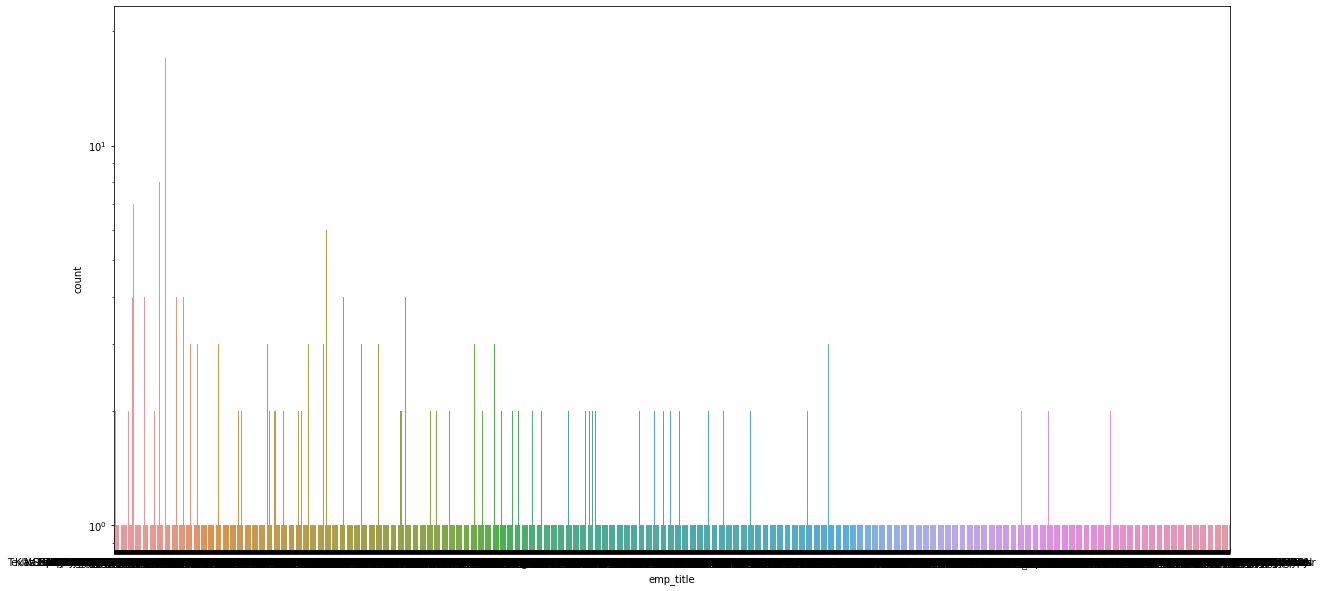

In [72]:
fig, axis = plt.subplots(figsize = (20,10))
axis.set(yscale = 'log')
sns.countplot(x='emp_title', data=loan_source_data[loan_source_data['loan_status']=='Charged Off'])

We cannot make any concrete conclusion from emp_title field as it is subjective

<AxesSubplot:xlabel='emp_length', ylabel='count'>

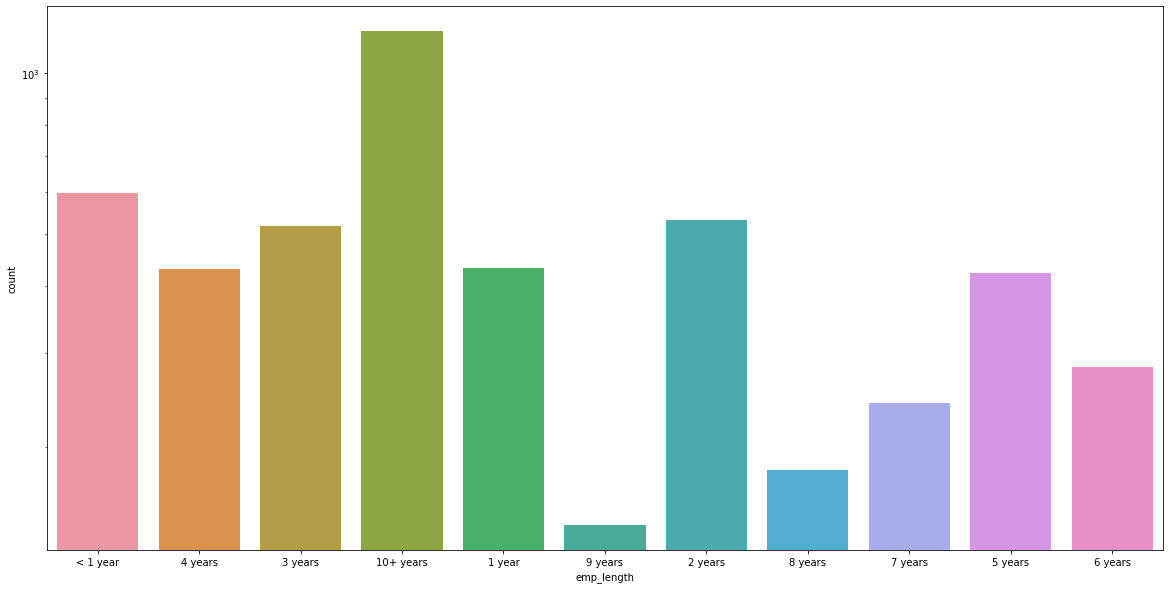

In [74]:
#Analyzing employment length
fig, axis = plt.subplots(figsize = (20,10))
axis.set(yscale = 'log')
sns.countplot(x='emp_length', data=loan_source_data[loan_source_data['loan_status']=='Charged Off'])

It looks like people with employment length <= 2 Years and > 10 years are more likely to default 

In [78]:
#Analyzing interest rate
#loan_source_data['int_rate'].head(10)
#Creating bins for interest rate
loan_source_data['int_rate'].describe()
loan_source_data['int_rate_bin'] = pd.cut(loan_source_data['int_rate'], bins=5,precision =0,labels=['5%-8.99%','9%-12.99%','13%-16.99%','17%-20.99%','21%-24%'])

<AxesSubplot:xlabel='int_rate_bin', ylabel='count'>

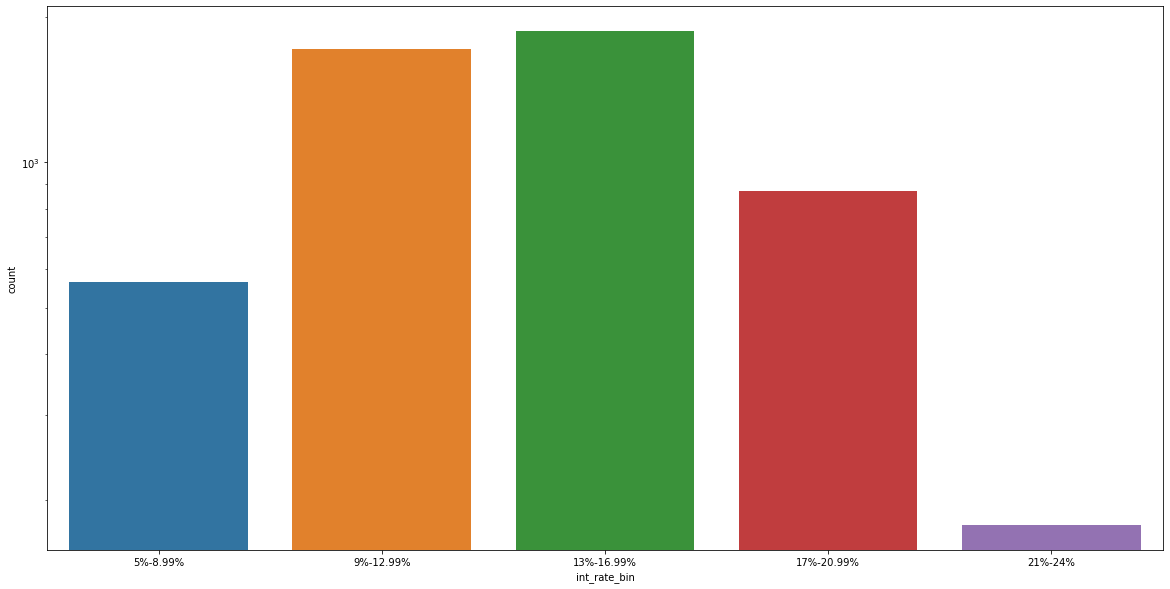

In [79]:
fig, axis = plt.subplots(figsize = (20,10))
axis.set(yscale = 'log')
sns.countplot(x='int_rate_bin', data=loan_source_data[loan_source_data['loan_status']=='Charged Off'])

More people are likely to default when the interest rate is between 9% and 17%

In [81]:
#Analyzing installment
loan_source_data['installment'].describe()

count    34832.000000
mean       304.305184
std        193.163813
min         15.690000
25%        161.130000
50%        263.780000
75%        399.780000
max       1302.690000
Name: installment, dtype: float64

In [82]:
#creating bins
loan_source_data['installment_bin'] = pd.cut(loan_source_data['installment'], bins=6,precision =0,labels=['0-250','250-500','500-750','750-1000','1000-1250','1250-1500'])

<AxesSubplot:xlabel='installment_bin', ylabel='count'>

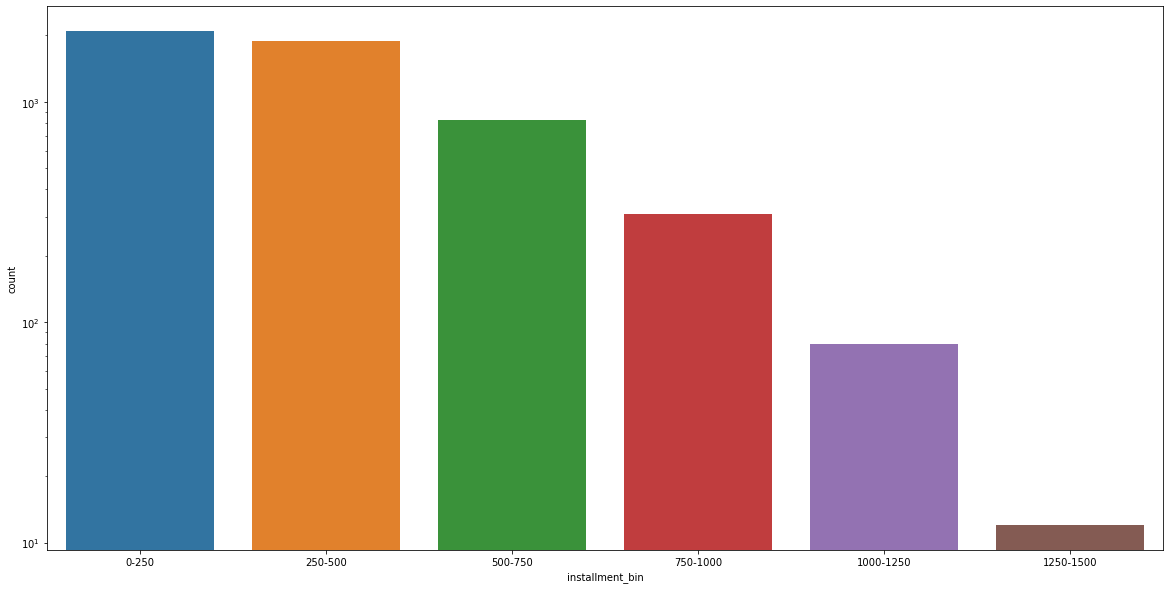

In [83]:
fig, axis = plt.subplots(figsize = (20,10))
axis.set(yscale = 'log')
sns.countplot(x='installment_bin', data=loan_source_data[loan_source_data['loan_status']=='Charged Off'])

People who pay lower monthly installment are more likely to default in loans. This should directly correlate to annual salary and we will check later

<AxesSubplot:xlabel='grade', ylabel='count'>

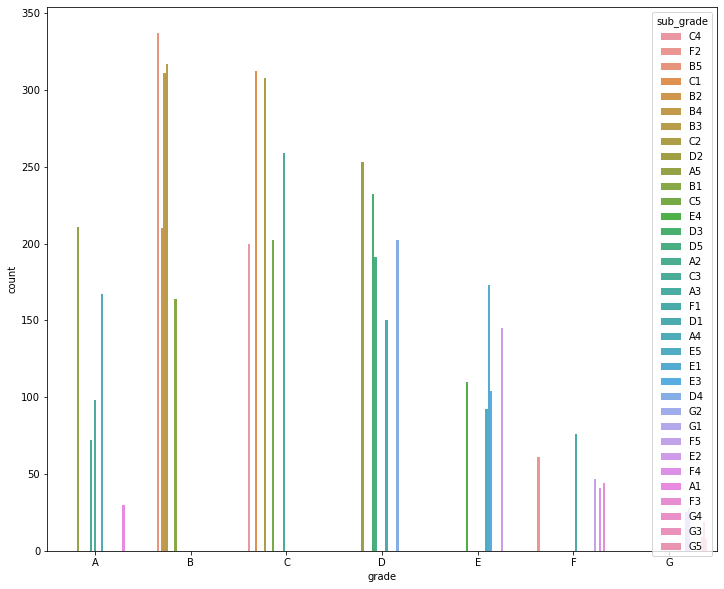

In [86]:
#Analyzing grade and sub-grade
fig, axis = plt.subplots(figsize=(12,10))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_source_data[loan_source_data.loan_status == 'Charged Off'])

In [92]:
#standardzing sub grade values to numeric
#loan_source_data.sub_grade = pd.to_numeric(loan_source_data.sub_grade.apply(lambda x : x[-1]))
loan_source_data.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<AxesSubplot:xlabel='grade', ylabel='count'>

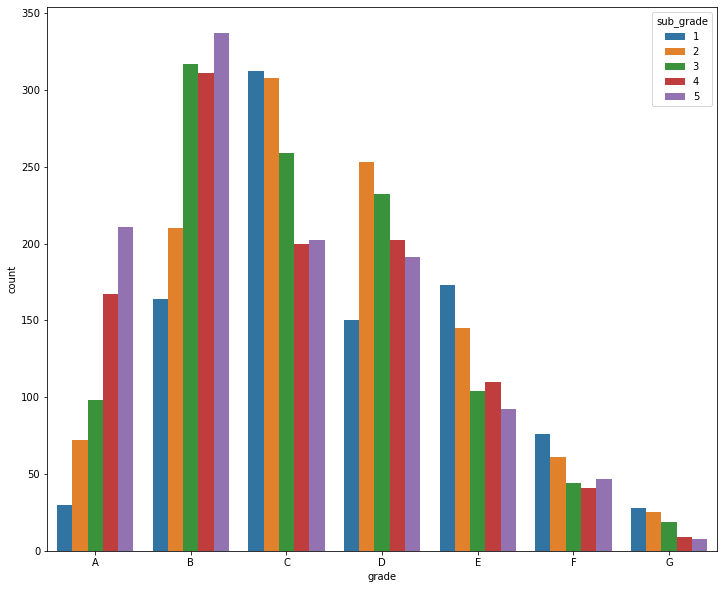

In [93]:
fig, axis = plt.subplots(figsize=(12,10))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_source_data[loan_source_data.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='grade', ylabel='count'>

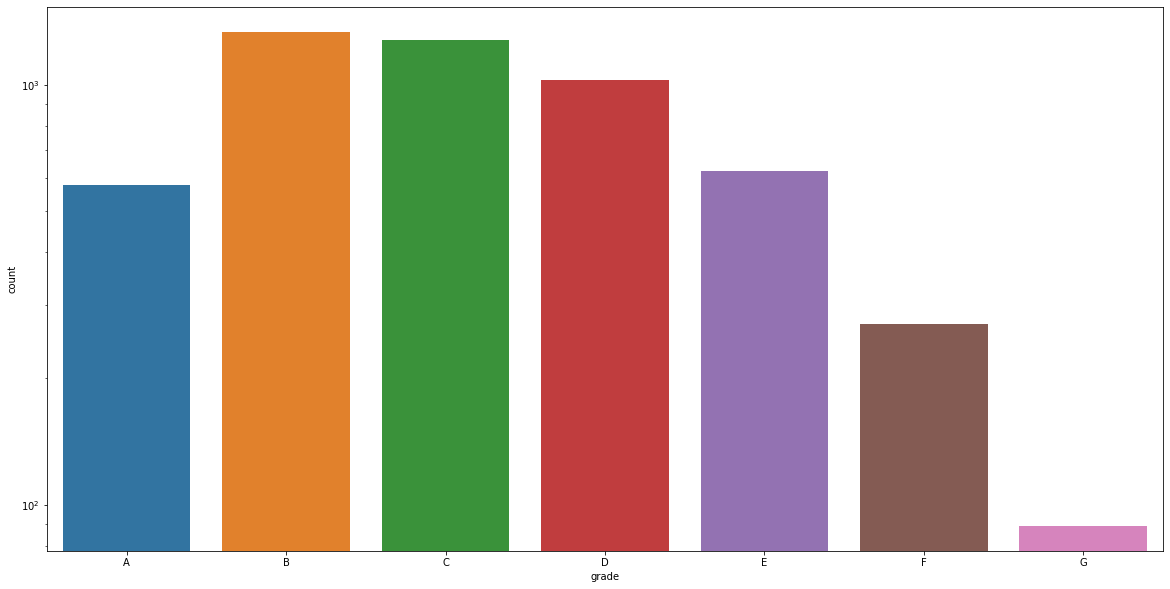

In [95]:
#Analyzing grades separately
fig, axis = plt.subplots(figsize = (20,10))
axis.set(yscale = 'log')
sns.countplot(x='grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'],data=loan_source_data[loan_source_data['loan_status']=='Charged Off'])

In [97]:
#Analyzing home ownership
loan_source_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

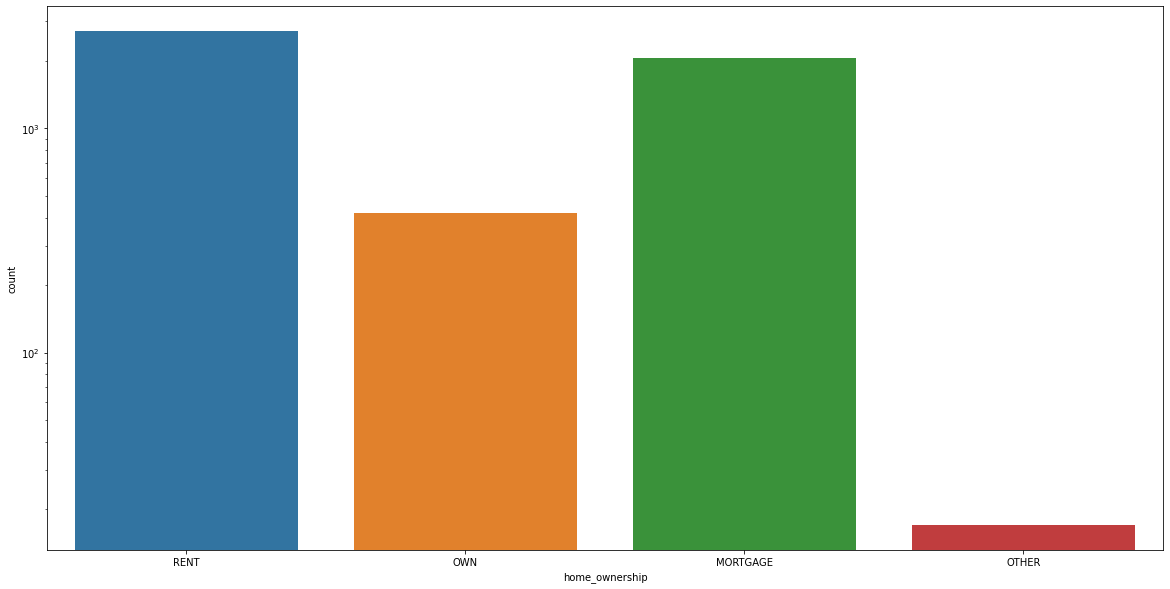

In [98]:
fig, axis = plt.subplots(figsize = (20,10))
axis.set(yscale = 'log')
sns.countplot(x='home_ownership',data=loan_source_data[loan_source_data['loan_status']=='Charged Off'])

Those who are already haing another mortgage and those having rented property are more likely to default

In [100]:
#Analyzing annual income
loan_source_data['annual_inc'].describe()

count     34832.000000
mean      57394.909501
std       23808.576786
min        4000.000000
25%       39828.000000
50%       54996.000000
75%       74000.000000
max      117000.000000
Name: annual_inc, dtype: float64

In [101]:
loan_source_data['annual_inc_bin'] = pd.cut(loan_source_data['annual_inc'], bins=5,precision =0,labels =['4000-27200','27200-50400','50400-73600','73600-96800','96800-120000'])

<AxesSubplot:xlabel='annual_inc_bin', ylabel='count'>

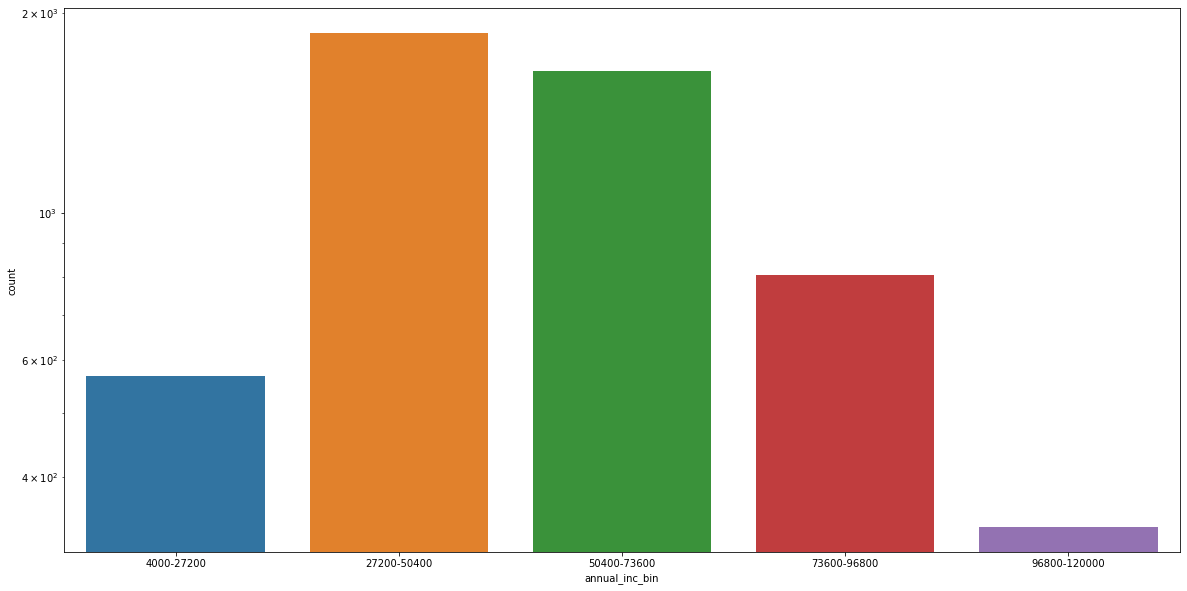

In [102]:
fig, axis = plt.subplots(figsize = (20,10))
axis.set(yscale = 'log')
sns.countplot(x='annual_inc_bin',data=loan_source_data[loan_source_data['loan_status']=='Charged Off'])

People with annual income between 27k to 51k are more likely to default

<AxesSubplot:xlabel='verification_status', ylabel='count'>

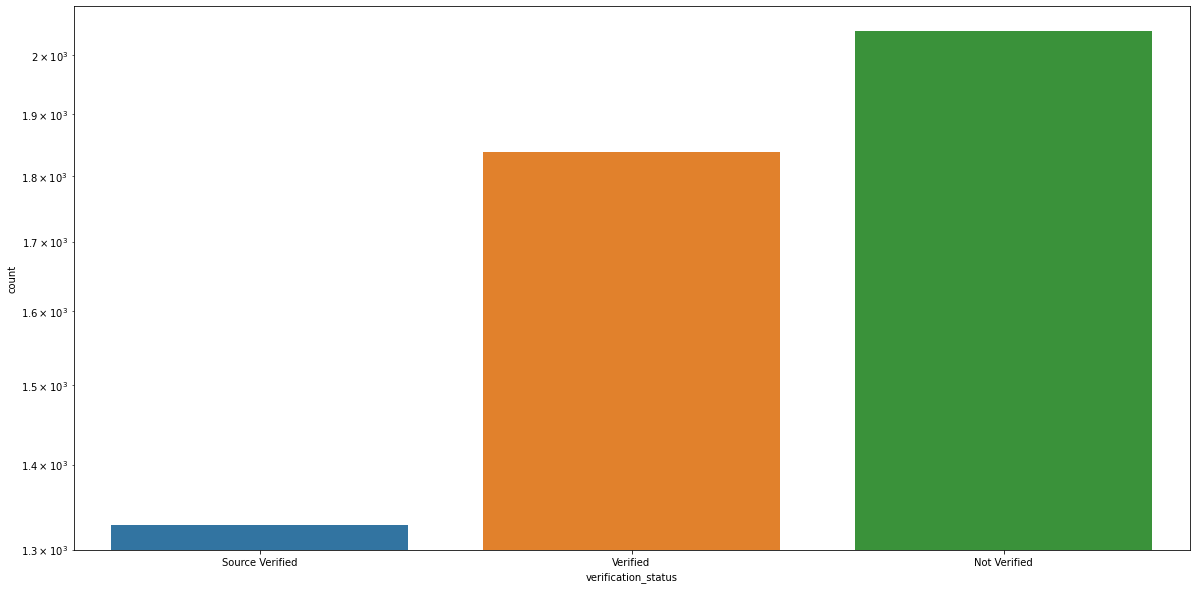

In [103]:
#Analyzing verification status
fig, axis = plt.subplots(figsize = (20,10))
axis.set(yscale = 'log')
sns.countplot(x='verification_status',data=loan_source_data[loan_source_data['loan_status']=='Charged Off'])

Accounts that are unverified are more likely to be defaulted

<AxesSubplot:xlabel='purpose', ylabel='count'>

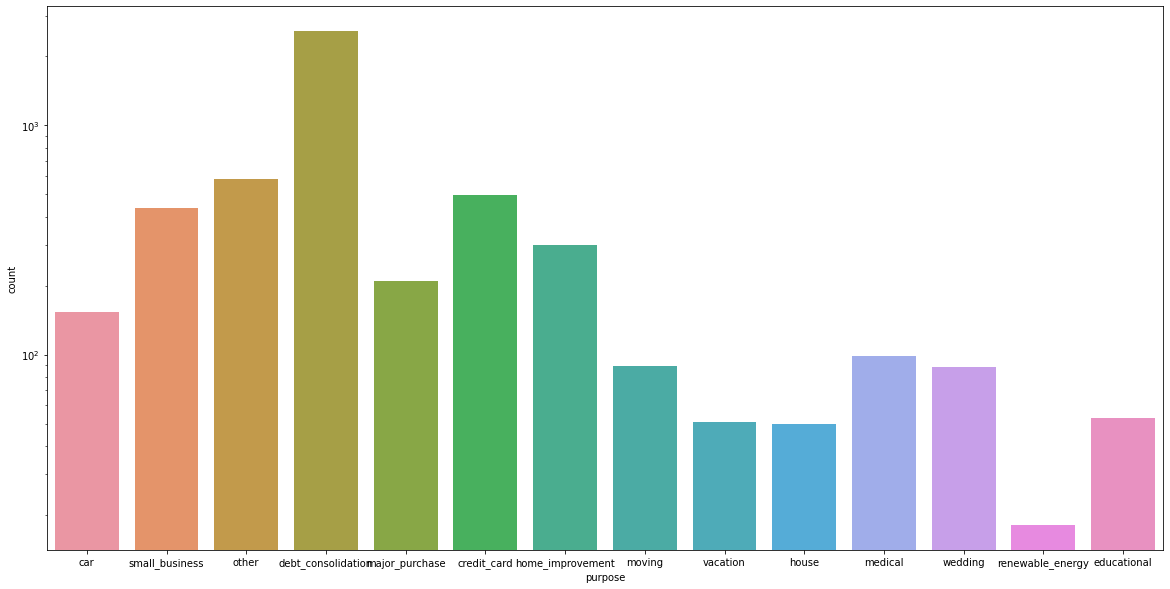

In [105]:
#Analyzing purpose
fig, axis = plt.subplots(figsize = (20,10))
axis.set(yscale = 'log')
sns.countplot(x='purpose',data=loan_source_data[loan_source_data['loan_status']=='Charged Off'])

Those taking loans for debt consolidation are more likely to default

<AxesSubplot:xlabel='addr_state', ylabel='count'>

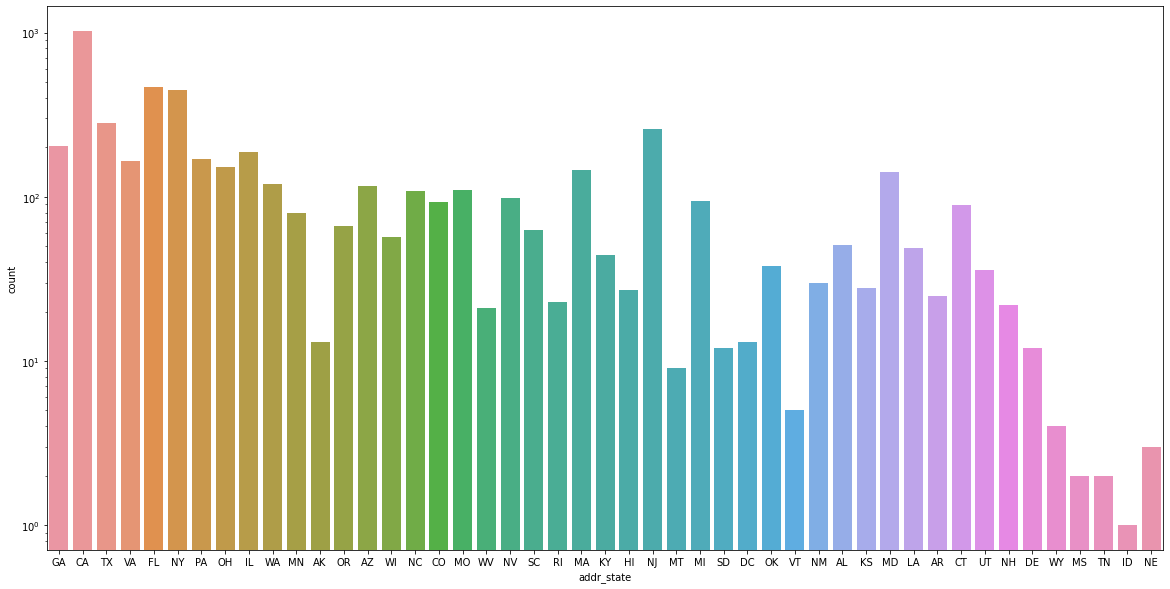

In [107]:
#Analyzing address state of customer
fig, axis = plt.subplots(figsize = (20,10))
axis.set(yscale = 'log')
sns.countplot(x='addr_state',data=loan_source_data[loan_source_data['loan_status']=='Charged Off'])

People from state of California are more likely to default

<AxesSubplot:xlabel='issue_month', ylabel='count'>

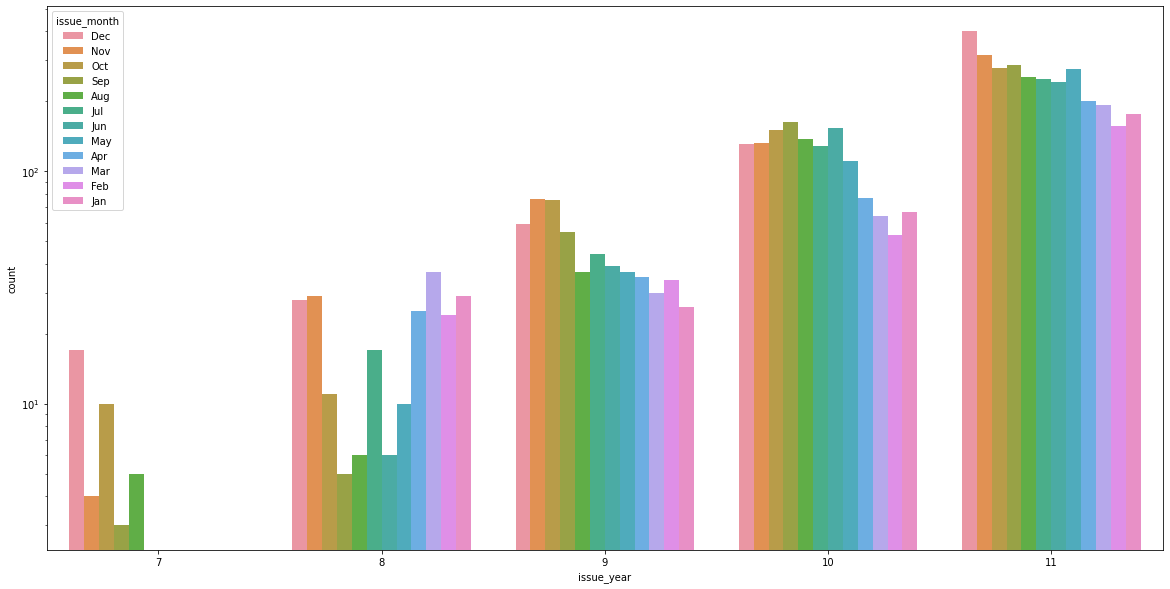

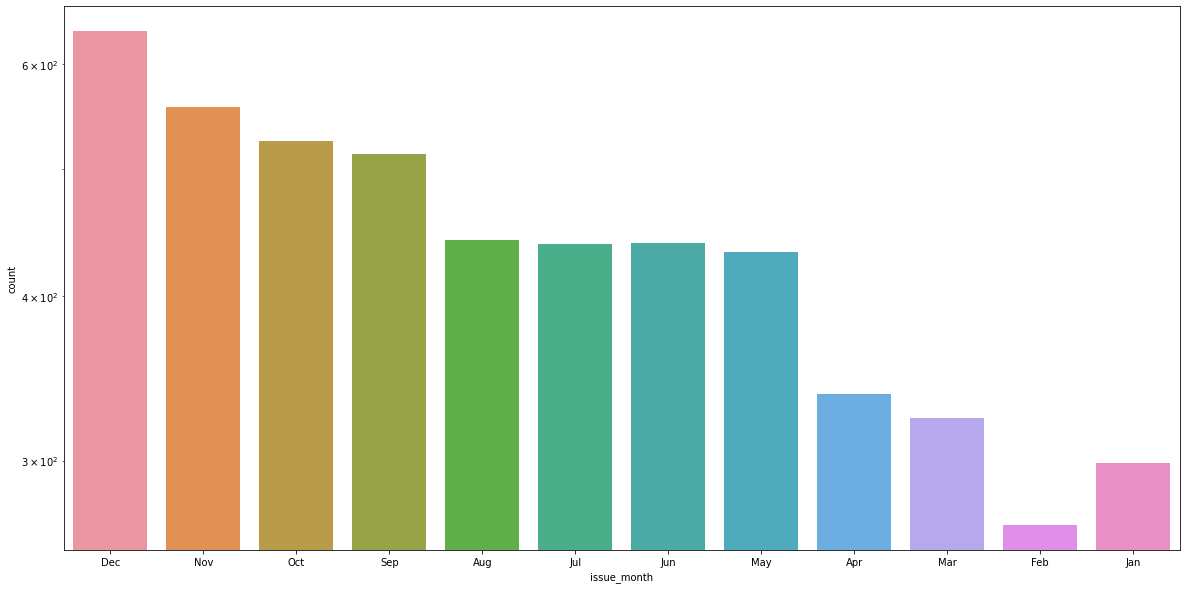

In [109]:
#analyzing issue year and issue month
fig, axis = plt.subplots(figsize = (20,10))
axis.set(yscale = 'log')
sns.countplot(x='issue_year',hue=loan_source_data['issue_month'],data=loan_source_data[loan_source_data['loan_status']=='Charged Off'])

fig, axis = plt.subplots(figsize = (20,10))
axis.set(yscale = 'log')
sns.countplot(x='issue_month',data=loan_source_data[loan_source_data['loan_status']=='Charged Off'])

Loans that were issued in Dec of 2011 were most defaulted

<AxesSubplot:xlabel='days_from_earliest_cr_line', ylabel='count'>

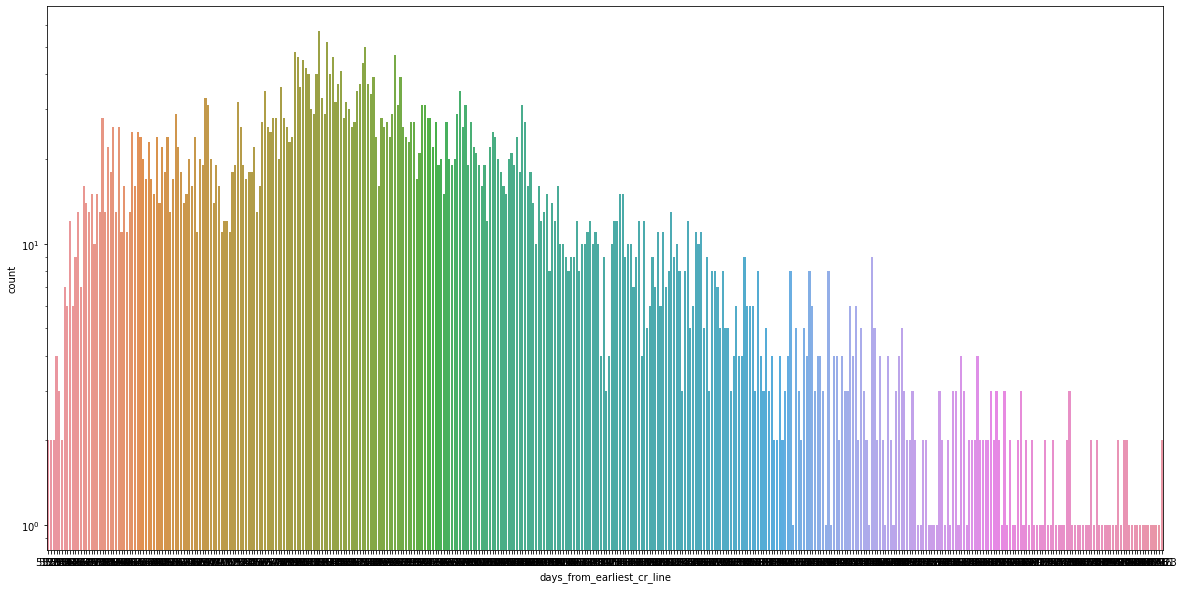

In [110]:
#Analyzing credit history length
fig, axis = plt.subplots(figsize = (20,10))
axis.set(yscale = 'log')
sns.countplot(x='days_from_earliest_cr_line',data=loan_source_data[loan_source_data['loan_status']=='Charged Off'])

In [111]:
#Need to bin credit history length
loan_source_data['days_from_earliest_cr_line'].describe()

count    34832.000000
mean      9205.840951
std       2452.474169
min       5060.000000
25%       7587.000000
50%       8744.000000
75%      10358.000000
max      28010.000000
Name: days_from_earliest_cr_line, dtype: float64

In [112]:
loan_source_data['earliest_cr_bin'] = pd.cut(loan_source_data['days_from_earliest_cr_line'], bins=5,precision =0,labels=['5k-10k','10k-15k','15k-20k','20k-25k','25k-30k'])

<AxesSubplot:xlabel='earliest_cr_bin', ylabel='count'>

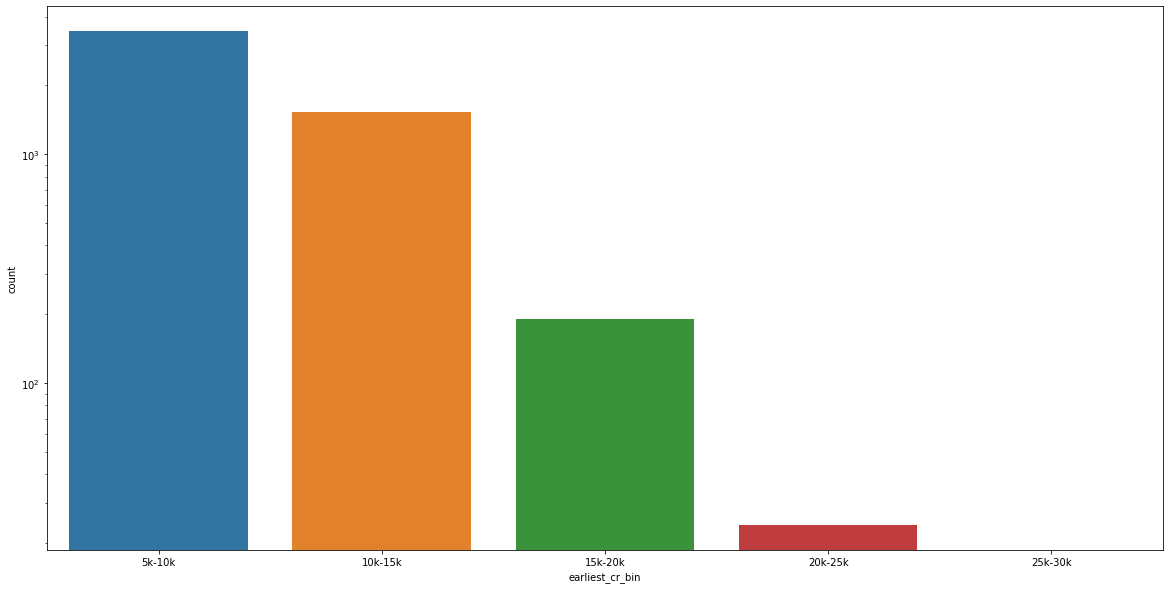

In [113]:
fig, axis = plt.subplots(figsize = (20,10))
axis.set(yscale = 'log')
sns.countplot(x='earliest_cr_bin',data=loan_source_data[loan_source_data['loan_status']=='Charged Off'])

People with recent credit history or less number of days from earliest credit line are more likely to default

Analyzing 'dti', 'delinq_2yrs','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util','total_acc', 'pub_rec_bankruptcies'

In [116]:
#dti
loan_source_data['dti'].describe()

count    34832.000000
mean        13.539539
std          6.673699
min          0.000000
25%          8.440000
50%         13.710000
75%         18.830000
max         29.990000
Name: dti, dtype: float64

In [118]:
loan_source_data['dti_bin'] = pd.cut(loan_source_data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

<AxesSubplot:xlabel='dti_bin', ylabel='count'>

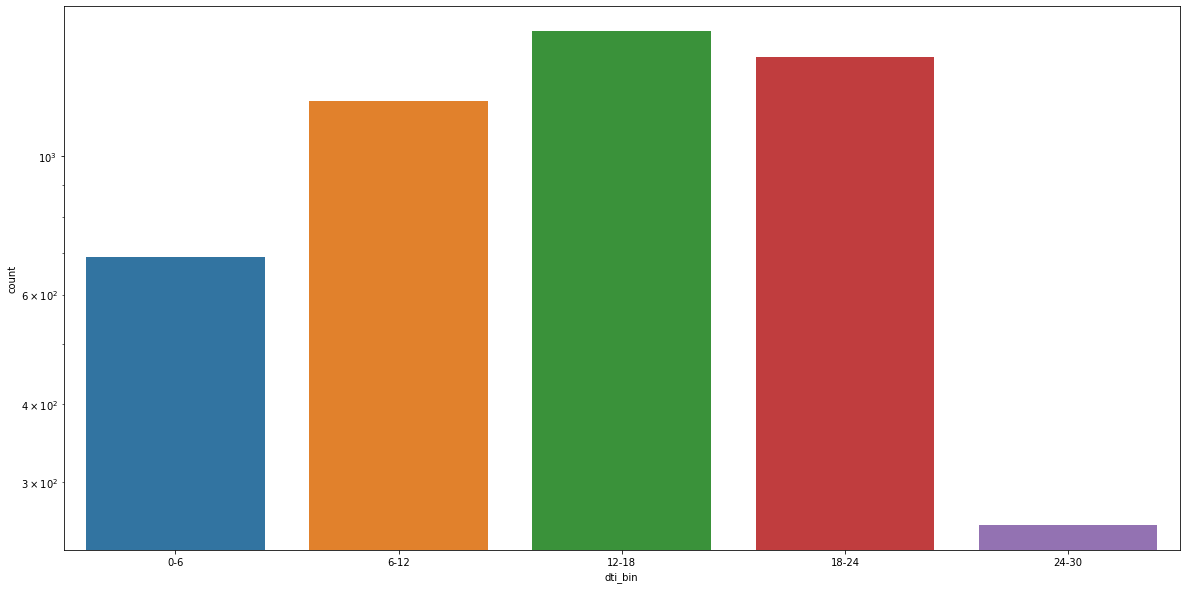

In [119]:
fig, axis = plt.subplots(figsize = (20,10))
axis.set(yscale = 'log')
sns.countplot(x='dti_bin',data=loan_source_data[loan_source_data['loan_status']=='Charged Off'])

In [121]:
#delinq_2yrs
loan_source_data['delinq_2yrs'].describe()

count    34832.000000
mean         0.142742
std          0.485626
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

In [122]:
loan_source_data['delinq_bin'] = pd.cut(loan_source_data['delinq_2yrs'], bins=6,precision =0,labels=['0-2','2-4','4-6','6-8','8-10','10-12'])

<AxesSubplot:xlabel='delinq_bin', ylabel='count'>

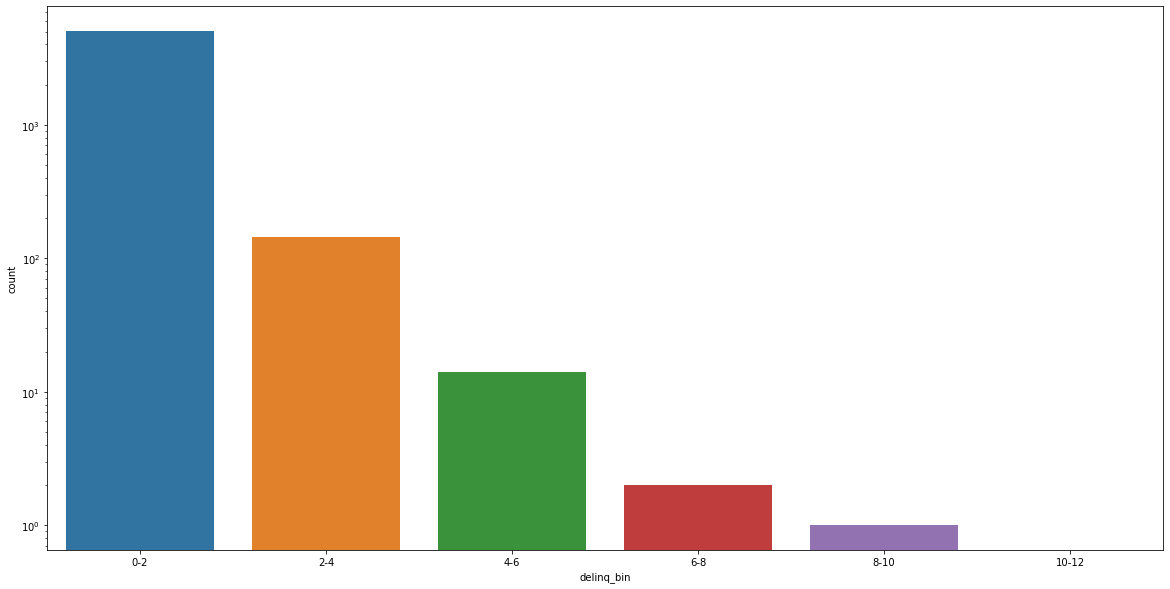

In [123]:
fig, axis = plt.subplots(figsize = (20,10))
axis.set(yscale = 'log')
sns.countplot(x='delinq_bin',data=loan_source_data[loan_source_data['loan_status']=='Charged Off'])

In [141]:
#inq_last_6mnths
loan_source_data['inq_last_6mths'].describe()
loan_source_data['open_acc'].describe()
loan_source_data['revol_util'].describe()
loan_source_data['total_acc'].describe()

count    34832.000000
mean        21.273972
std         11.093753
min          2.000000
25%         13.000000
50%         20.000000
75%         28.000000
max         87.000000
Name: total_acc, dtype: float64

In [143]:
loan_source_data['inq_last_6m_bin'] = pd.cut(loan_source_data['inq_last_6mths'],bins = 5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan_source_data['open_acc_bin'] = pd.cut(loan_source_data['open_acc'],bins = 5,precision =0,labels=['0-10','10-20','20-30','30-40','40-50'])
loan_source_data['revol_util_bin'] = pd.cut(loan_source_data['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan_source_data['total_acc_bin'] = pd.cut(loan_source_data['total_acc'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])

<AxesSubplot:xlabel='inq_last_6m_bin', ylabel='count'>

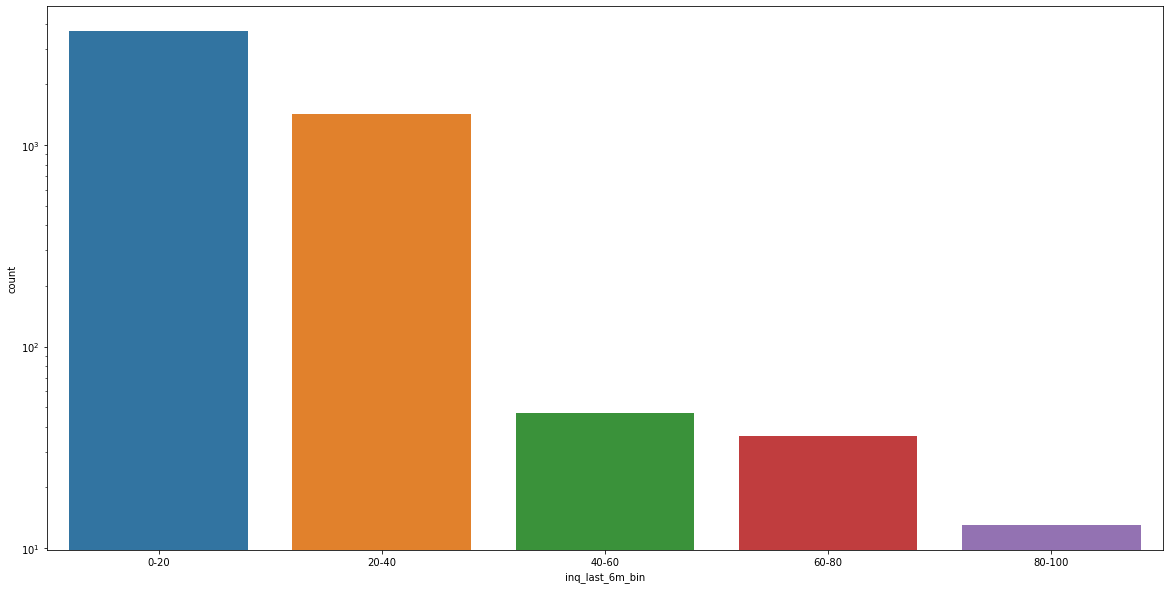

In [134]:
fig, axis = plt.subplots(figsize = (20,10))
axis.set(yscale = 'log')
sns.countplot(x='inq_last_6m_bin',data=loan_source_data[loan_source_data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='open_acc_bin', ylabel='count'>

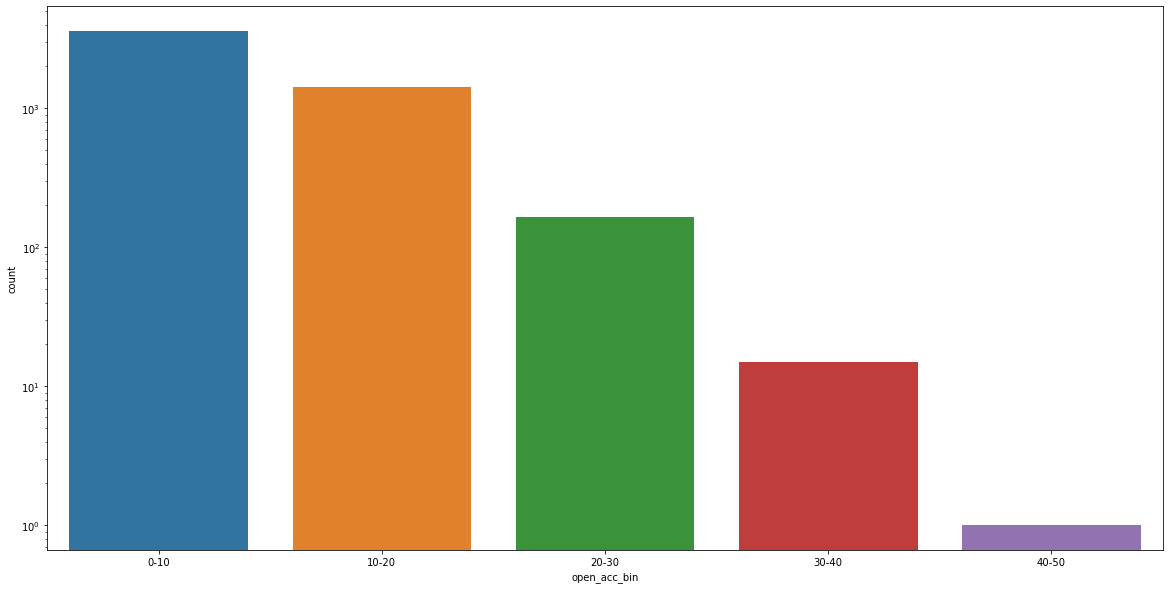

In [137]:
fig, axis = plt.subplots(figsize = (20,10))
axis.set(yscale = 'log')
sns.countplot(x='open_acc_bin',data=loan_source_data[loan_source_data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='revol_util_bin', ylabel='count'>

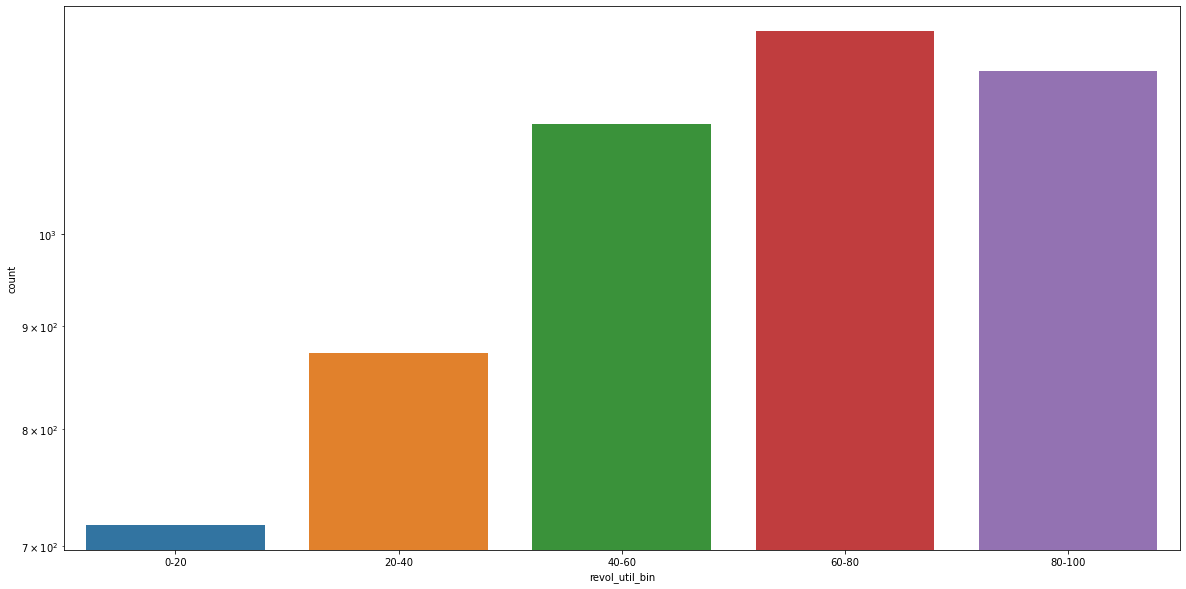

In [139]:
fig, axis = plt.subplots(figsize = (20,10))
axis.set(yscale = 'log')
sns.countplot(x='revol_util_bin',data=loan_source_data[loan_source_data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='total_acc_bin', ylabel='count'>

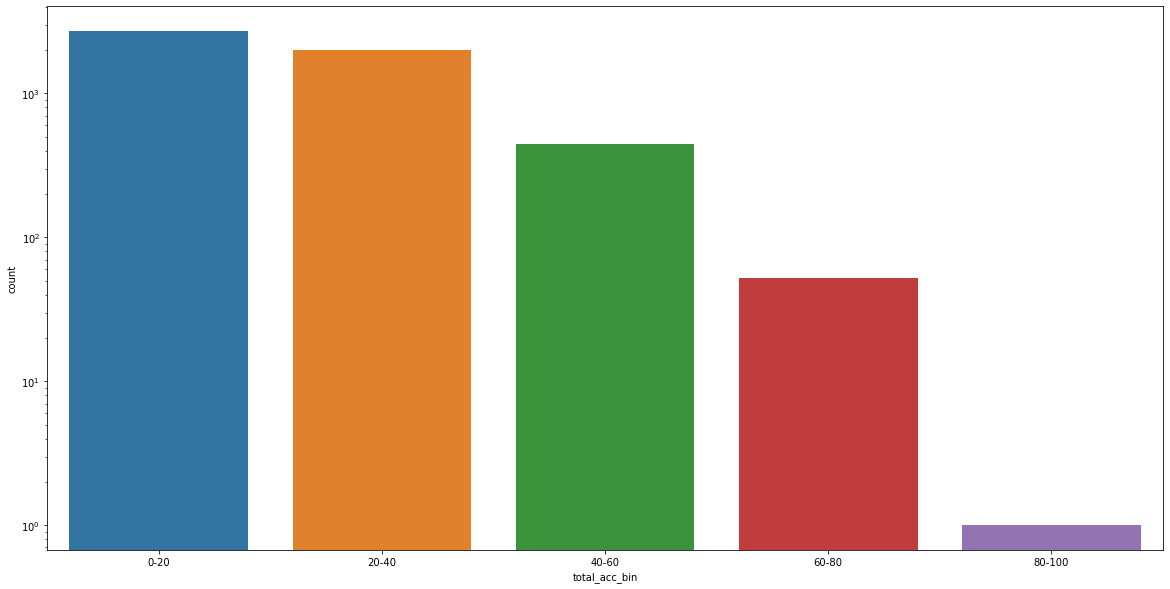

In [145]:
fig, axis = plt.subplots(figsize = (20,10))
axis.set(yscale = 'log')
sns.countplot(x='total_acc_bin',data=loan_source_data[loan_source_data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='term', ylabel='count'>

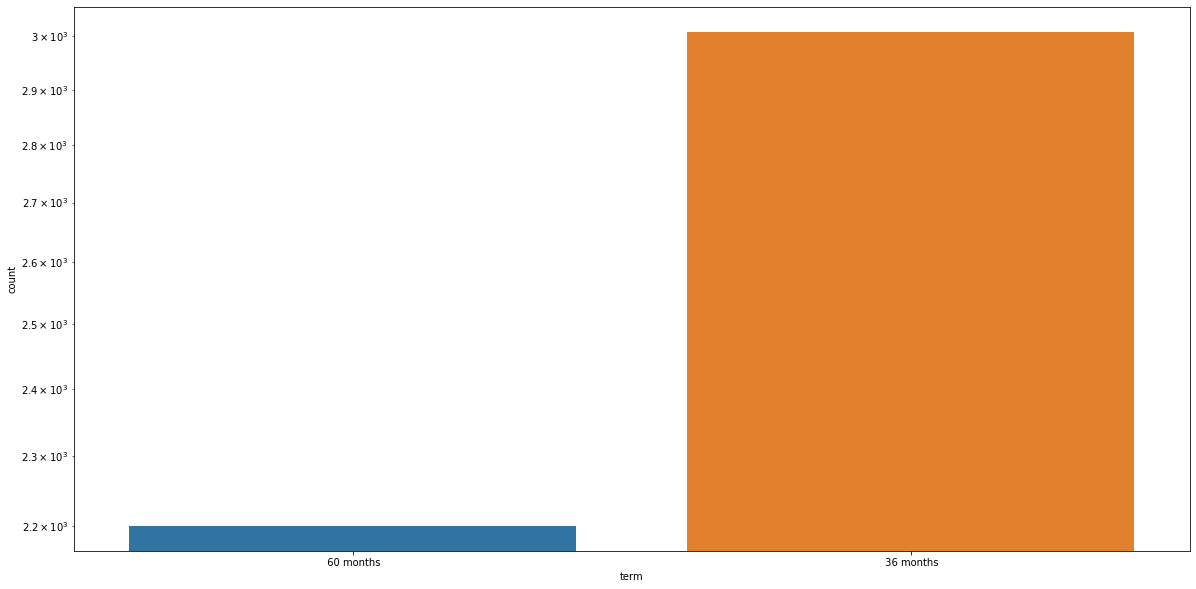

In [146]:
#Analyzing loan term
fig, axis = plt.subplots(figsize = (20,10))
axis.set(yscale = 'log')
sns.countplot(x='term',data=loan_source_data[loan_source_data['loan_status']=='Charged Off'])

# Observation summary from above study

### Applicants who show the below characteristics are most likely to default on lending:

- Employment length of more than 10 years
- Interest rate between 13%-16.99%
- Installment amount less than 250
- Grade is B and Sub grade is 5
- Stays in rented accomodation
- Annual income between 27200 and 50400
- Accounts that are not verified
- Accounts that have taken loan for the purpose of Debt Consolidation
- People from California state
- Loans that were issued in Dec 2011
- Customers who have relatively newer credit line history of less than 10k days
- DTI between 12 and 18
- The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years is less than 2
- Inquiry in last 6 months is less than 20
- The number of open credit lines in the borrower's credit file is less than 10
- Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit is between 60 and 80
- Total number of credit lines in account is less than 20
- Loan term is 36 months

## Bivariate Analysis - will be conducting study of various numerical values like loan amount, annual income, interest rate against categorical fields

In [147]:
#Loan amount and Employment length

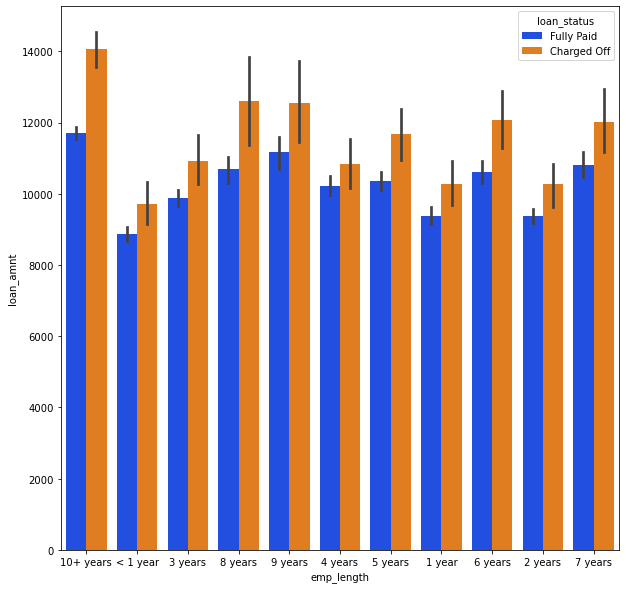

In [151]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_source_data,x='emp_length', y='loan_amnt', hue ='loan_status',palette="bright")
plt.show()

So people who have more than 10 years of employment are getting higher loans approved. They also have the highest defaulter rate

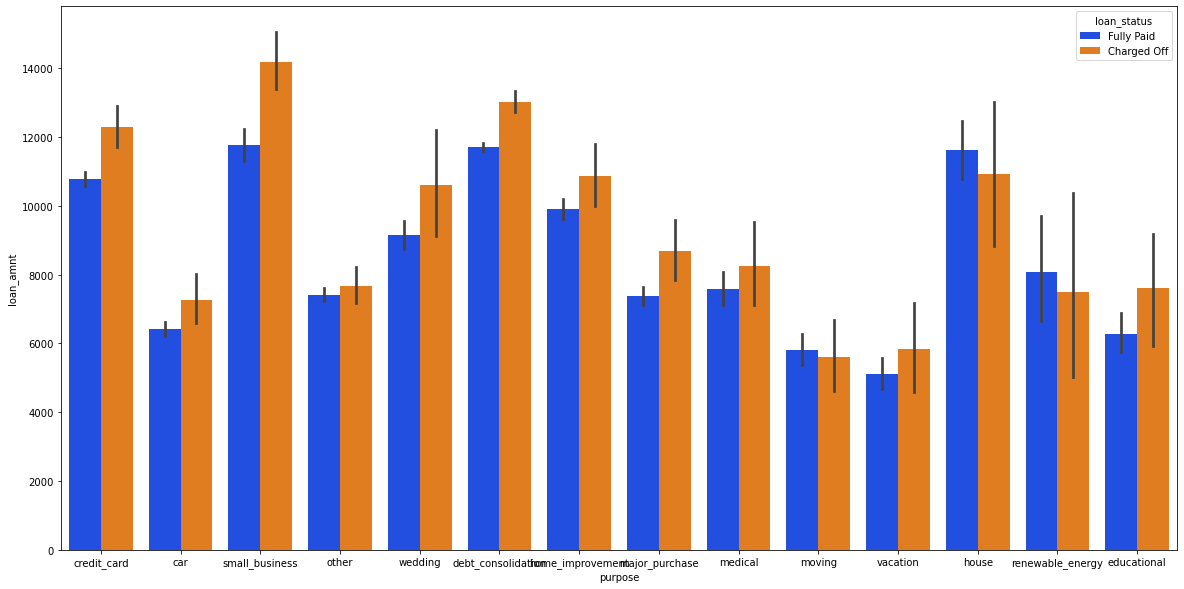

In [156]:
# Loan amount and Purpose

plt.figure(figsize=(20,10))
sns.barplot(data =loan_source_data,x='purpose', y='loan_amnt', hue ='loan_status',palette="bright")
plt.show()

Though in univariate analysis it seemed debt consolidation purpose has most defaulters, from the above analysis it is inferred that most loans are issued for small_business, debt_consolidation and house. Small business loans with high loan amount are the most defaulted ones.

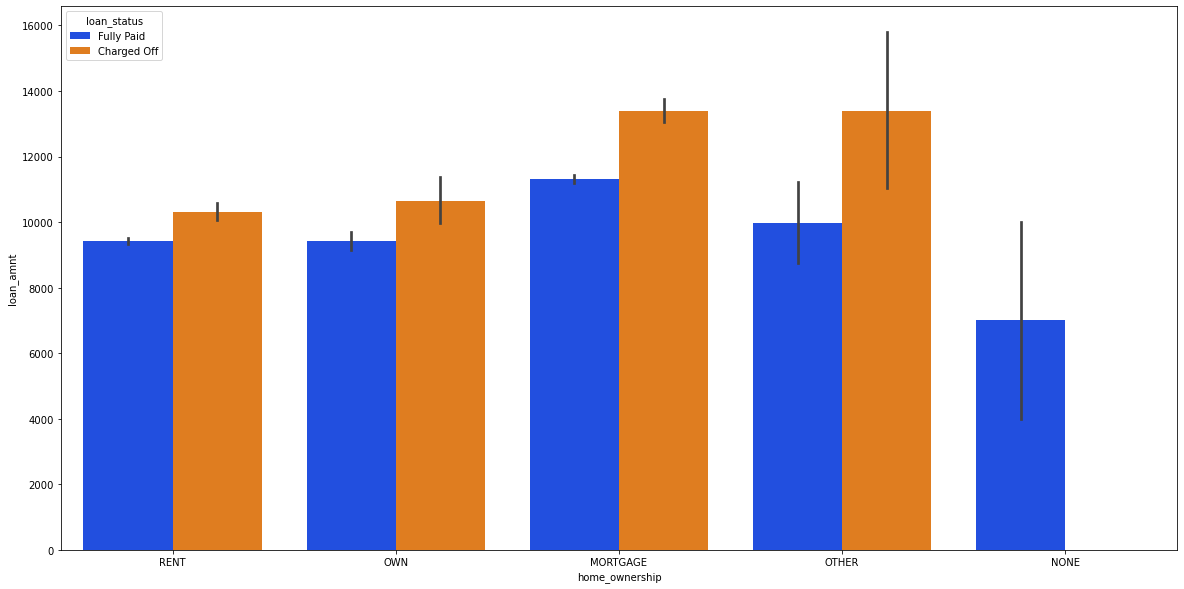

In [158]:
#Loan amount and home ownership
plt.figure(figsize=(20,10))
sns.barplot(data =loan_source_data,x='home_ownership', y='loan_amnt', hue ='loan_status',palette="bright")
plt.show()

Those with existing mortgage are given higher loan amounts. Those who own a home are issued significant lower loan amount.

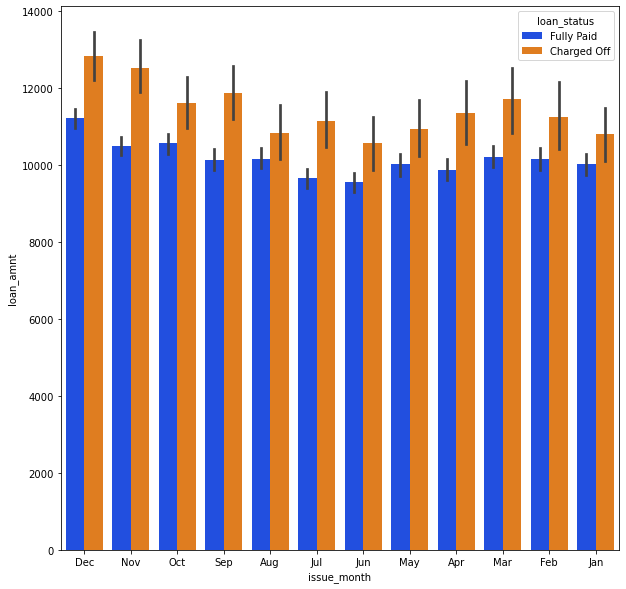

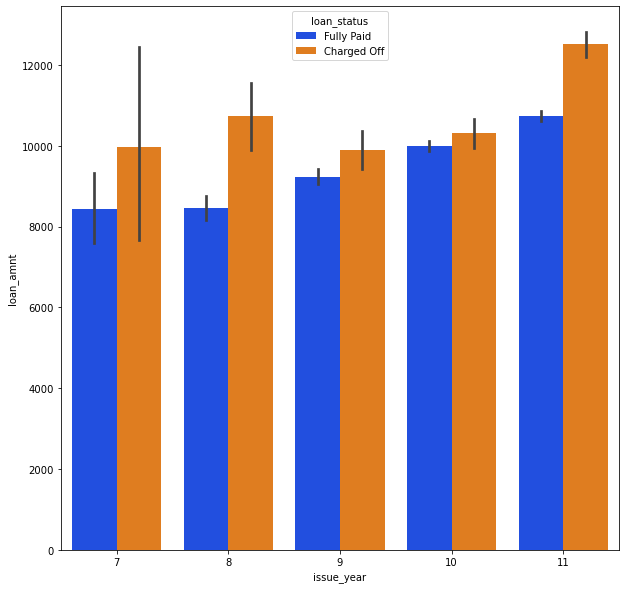

In [160]:
#Loan amount and issued year and month
plt.figure(figsize=(10,10))
sns.barplot(data =loan_source_data,x='issue_month', y='loan_amnt', hue ='loan_status',palette="bright")
plt.show()
plt.figure(figsize=(10,10))
sns.barplot(data =loan_source_data,x='issue_year', y='loan_amnt', hue ='loan_status',palette="bright")
plt.show()

The biggest loans were issued in the year 2011 and month of December.

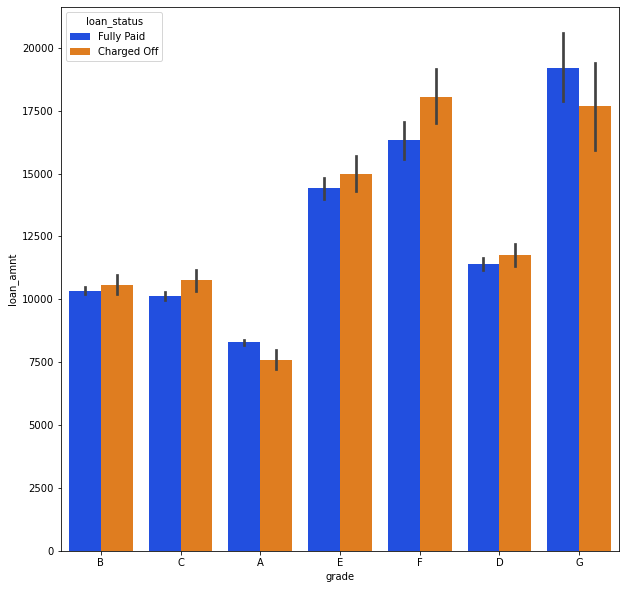

In [161]:
#Loan amount and grade
plt.figure(figsize=(10,10))
sns.barplot(data =loan_source_data,x='grade', y='loan_amnt', hue ='loan_status',palette="bright")
plt.show()

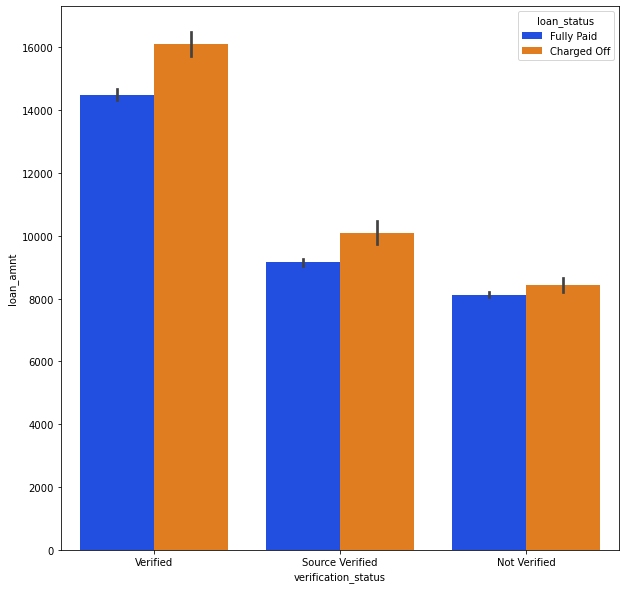

In [162]:
#Loan amount and verification status
plt.figure(figsize=(10,10))
sns.barplot(data =loan_source_data,x='verification_status', y='loan_amnt', hue ='loan_status',palette="bright")
plt.show()

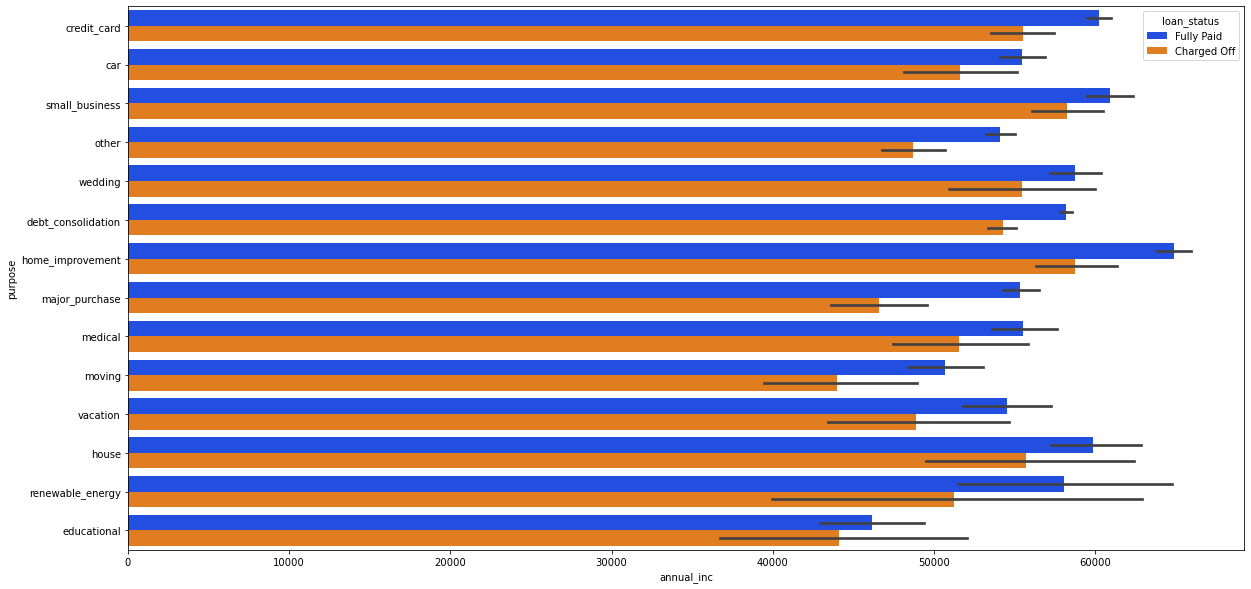

In [171]:
#Annual income and Loan Purpose
plt.figure(figsize=(20,10))
sns.barplot(data =loan_source_data,x='annual_inc', y='purpose', hue ='loan_status',palette="bright")
plt.show()

Loan applicants with higher salary mostly applied loans for home_improvment, house, renewable_energy and small_businesses

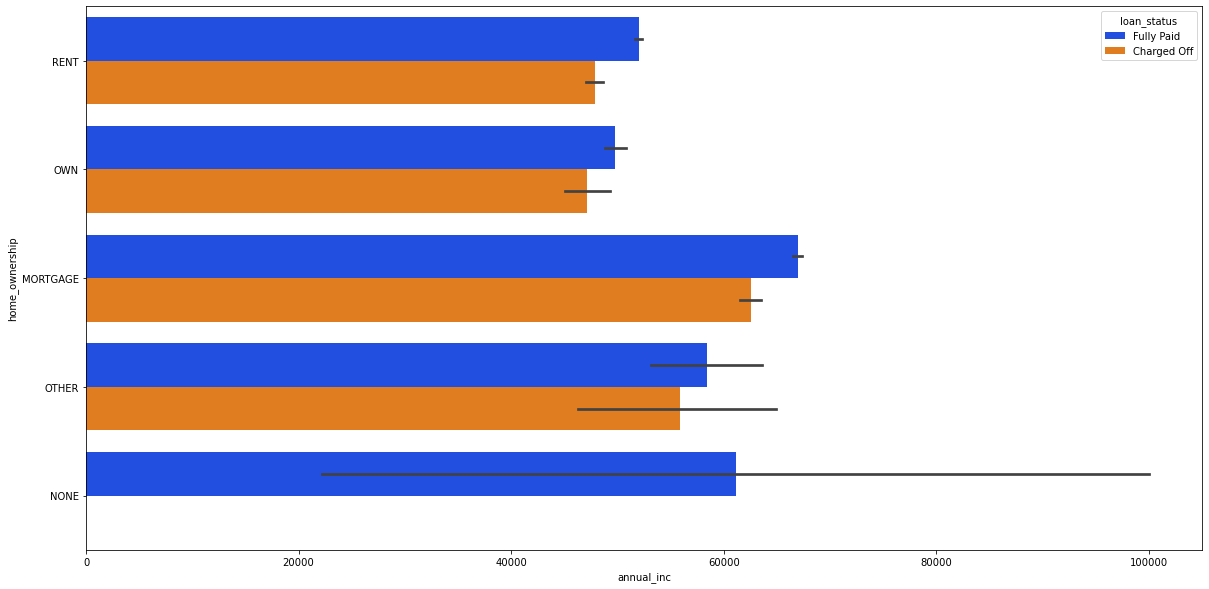

In [172]:
#Annual income and home ownership
plt.figure(figsize=(20,10))
sns.barplot(data =loan_source_data,x='annual_inc', y='home_ownership', hue ='loan_status',palette="bright")
plt.show()

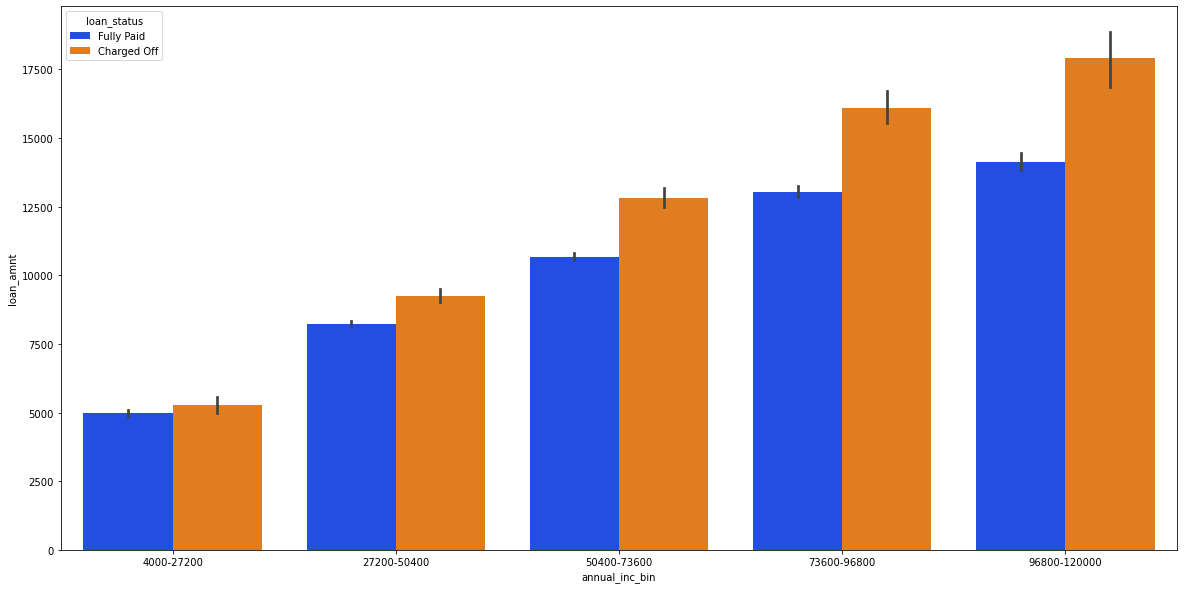

In [175]:
#Annual income and loan amount
plt.figure(figsize=(20,10))
sns.barplot(data =loan_source_data,x='annual_inc_bin', y='loan_amnt', hue ='loan_status',palette="bright")
plt.show()

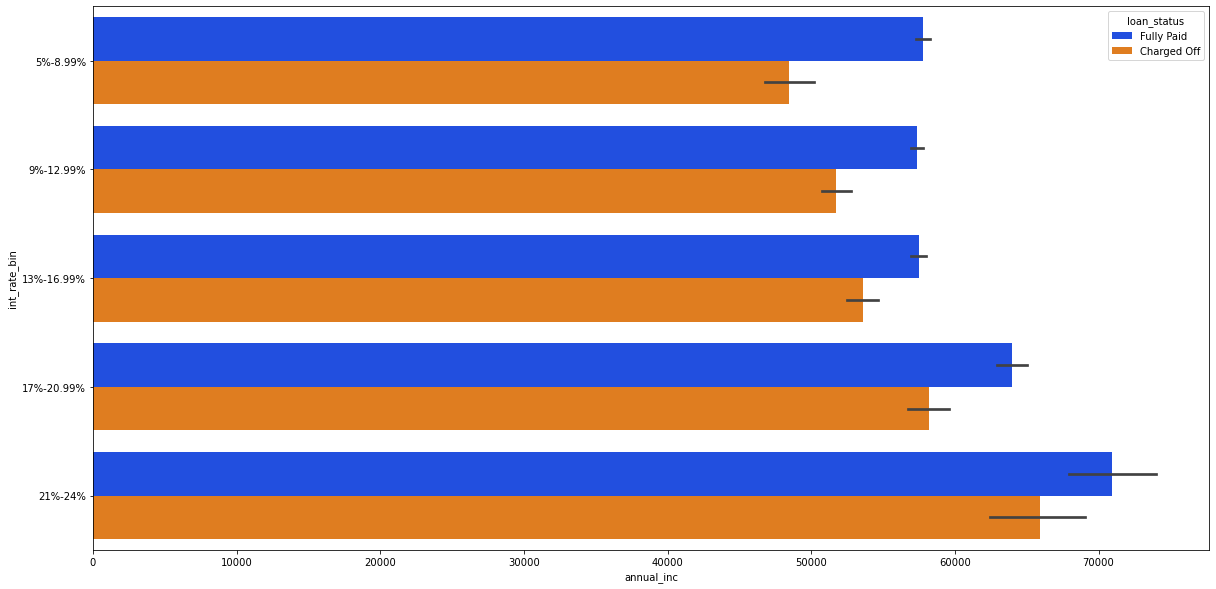

In [176]:
#Annual income and interest rate
plt.figure(figsize=(20,10))
sns.barplot(data =loan_source_data,x='annual_inc', y='int_rate_bin', hue ='loan_status',palette="bright")
plt.show()

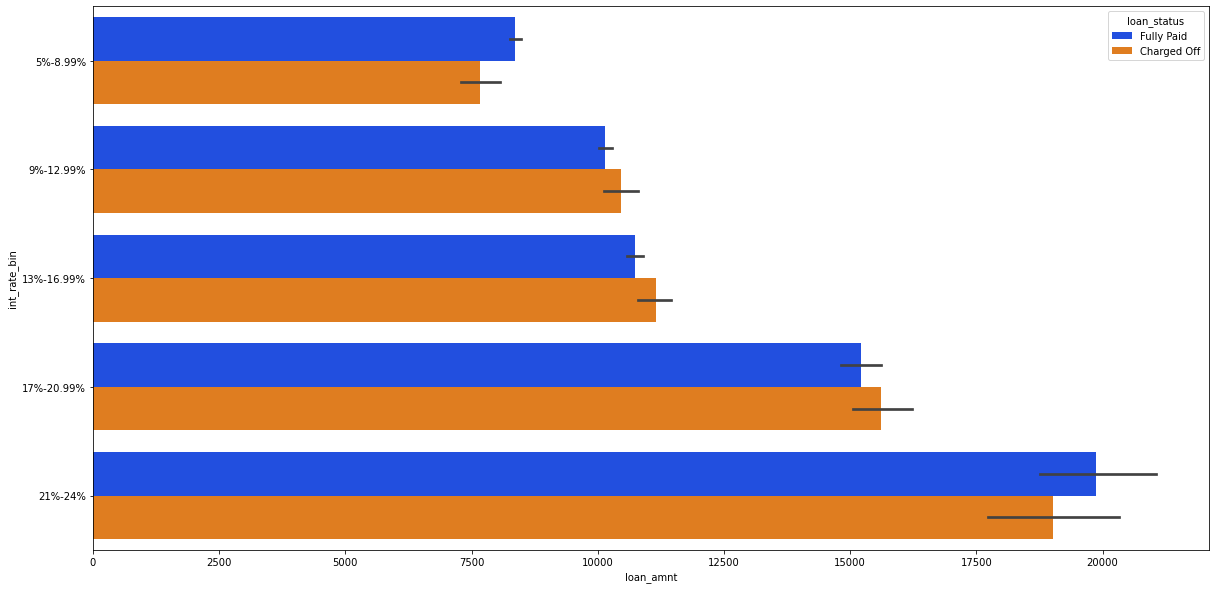

In [179]:
#Loan amount and interest
plt.figure(figsize=(20,10))
sns.barplot(data =loan_source_data,x='loan_amnt', y='int_rate_bin', hue ='loan_status',palette="bright")
plt.show()

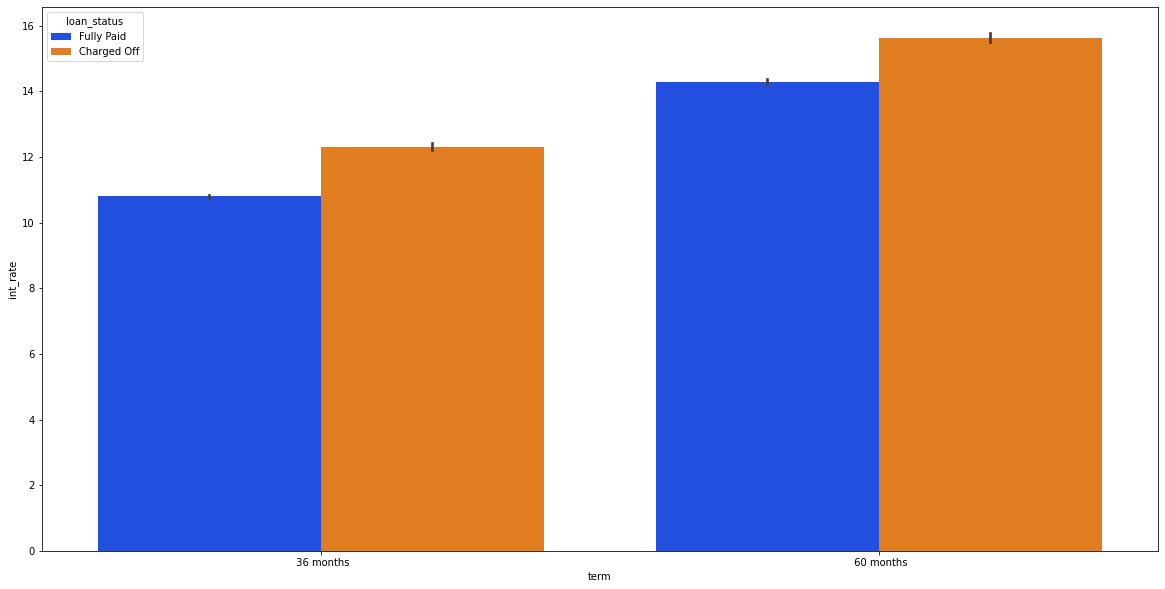

In [180]:
#Term and interest rate
plt.figure(figsize=(20,10))
sns.barplot(data =loan_source_data,x='term', y='int_rate', hue ='loan_status',palette="bright")
plt.show()

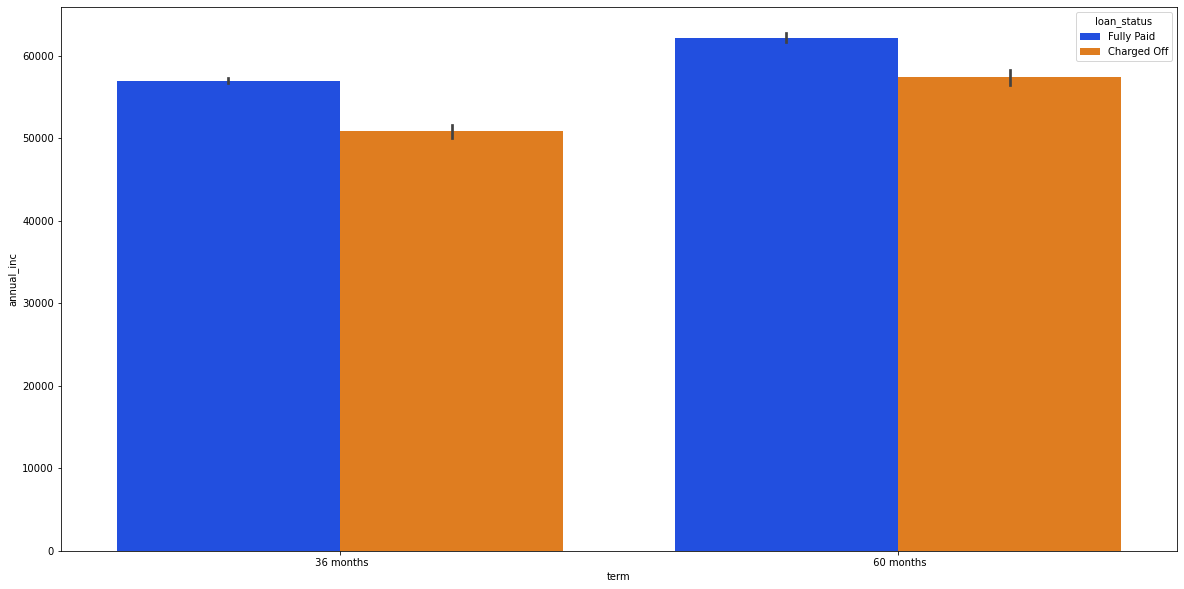

In [183]:
#Term and annual income
plt.figure(figsize=(20,10))
sns.barplot(data =loan_source_data,x='term', y='annual_inc', hue ='loan_status',palette="bright")
plt.show()

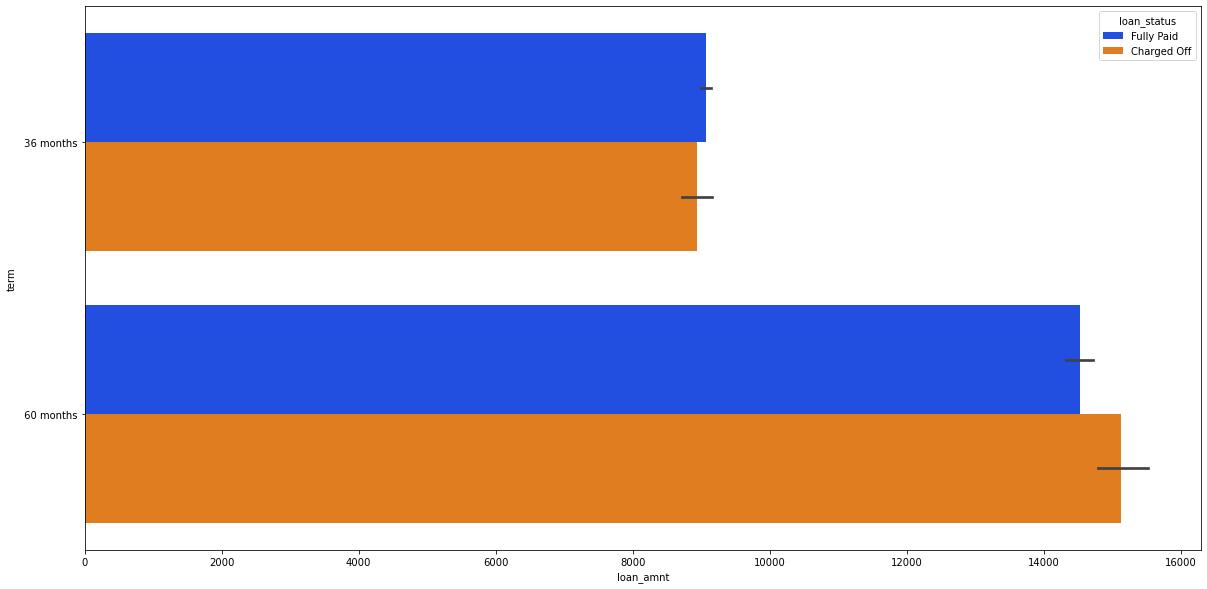

In [185]:
#Term and loan amount
plt.figure(figsize=(20,10))
sns.barplot(data =loan_source_data,x='loan_amnt', y='term', hue ='loan_status',palette="bright")
plt.show()

## Observations from above analysis for charged-off data

- When employment length is 10 years and higher and loan amount between 12000 & 14000
- When purpose is small_business and loan amount is greater than 14000
- When home ownership is mortgage and loan amount is between 12000 and 14000
- When the loans were issued in December of 2011
- When grade is F and loan amount between 17500 and 20000
- When verification status is verified and loan amount between 14000 and 16000
- When annual income is higher than 60000 and purpose is home improvement
- When annual income is between 60000 and 80000 and home ownership is Mortgage
- When annual income is between 95000 and 12000 and loan_amount is more than 17500
- When annual income is between 60000 and 70000 and interest rate is between 21-24%
- When loan_amount is between 17500 and 20000 and interest rate is between 21-24%
- When interest rate is between 14-16% and term is 60 months
- When annual income is 50000-60000 and term is 60 months
- When loan_amount is 14000-16000 and term is 60 months

## Correlation map

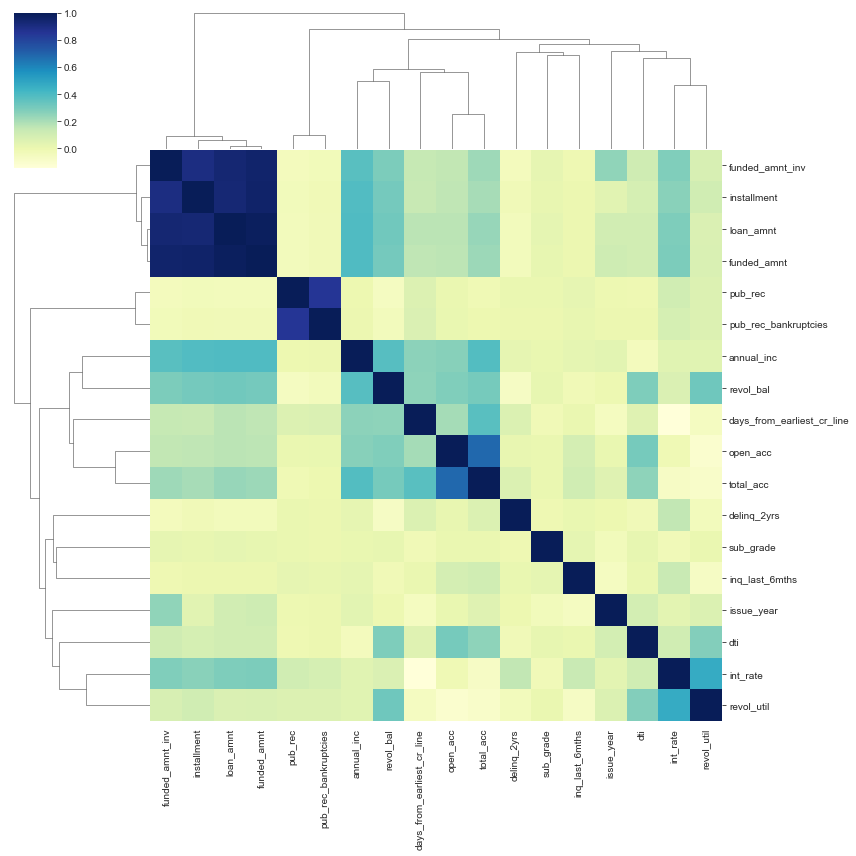

In [188]:
#creating correlation heat map
sns.set_style("whitegrid")
sns.clustermap(data=loan_source_data.corr(), cmap='YlGnBu', figsize=(12,12))
plt.show()

- Fields loan_amnt, funded_amnt, funded_amnt_inv and installment are highly correlated
- These fields are proportional to each other
- Also the public records related fields pub_rec & pub_rec_bankrupcies
- Number of accounts related fields open_acc & total_acc are correlated